## <center>LIFE EXPECTANCY BY WHO

# 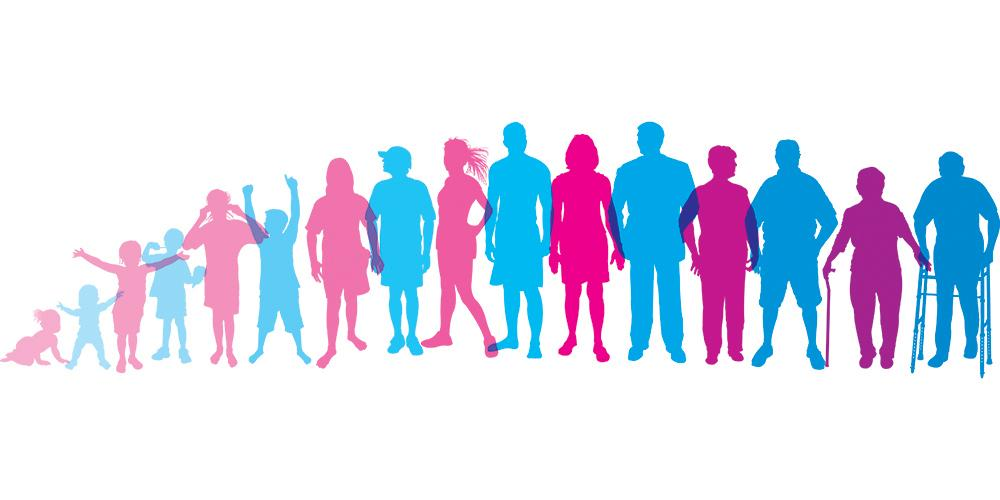

# About Dataset
Context

 This gives motivation to resolve a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population. 

Content

 The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 . The final dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

# Importing Necessary Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [79]:
df=pd.read_csv("./Life Expectancy Data (1).csv")
df.head()

Country  Year      Status  Life_expectancy   Adult_ Mortality  \
0  Afghanistan  2015  Developing              65.0             263.0   
1  Afghanistan  2014  Developing              59.9             271.0   
2  Afghanistan  2013  Developing              59.9             268.0   
3  Afghanistan  2012  Developing              59.5             272.0   
4  Afghanistan  2011  Developing              59.2             275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total_expenditure  Diphtheria    HIV_AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness _1-19 years   thinness 5-9 years  Income   Schooling  
0                   17.2                 17.3    0.479       10.1  
1                   17.5                 17.5    0.476       10.0  
2                   17.7                 17.7    0.470        9.9  
3                   17.9                 18.0    0.463        9.8  
4                   18.2                 18.2    0.454        9.5  

[5 rows x 22 columns]

#### EXPLORATORY DATA ANALYSIS

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_expectancy         2928 non-null   float64
 4   Adult_ Mortality        2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   Hepatitis_B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10   BMI                    2904 non-null   float64
 11  under_five deaths       2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total_expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

In [4]:
df.describe()

Year  Life_expectancy   Adult_ Mortality  infant_deaths  \
count  2938.000000       2928.000000       2928.000000    2938.000000   
mean   2007.518720         69.224932        164.796448      30.303948   
std       4.613841          9.523867        124.292079     117.926501   
min    2000.000000         36.300000          1.000000       0.000000   
25%    2004.000000         63.100000         74.000000       0.000000   
50%    2008.000000         72.100000        144.000000       3.000000   
75%    2012.000000         75.700000        228.000000      22.000000   
max    2015.000000         89.000000        723.000000    1800.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under_five deaths         Polio  Total_expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV_AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness _1-19 years   thinness 5-9 years      Income     Schooling  
count            2904.000000          2904.000000  2771.000000  2775.000000  
mean                4.839704             4.870317     0.627551    11.992793  
std                 4.420195             4.508882     0.210904     3.358920  
min                 0.100000             0.100000     0.000000     0.000000  
25%                 1.600000             1.500000     0.493000    10.100000  
50%                 3.300000             3.300000     0.677000    12.300000  
75%                 7.200000             7.200000     0.779000    14.300000  
max                27.700000            28.600000     0.948000    20.700000

In [5]:
df.shape

(2938, 22)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().mean()*100

Country                    0.000000
Year                       0.000000
Status                     0.000000
Life_expectancy            0.340368
Adult_ Mortality           0.340368
infant_deaths              0.000000
Alcohol                    6.603131
percentage_expenditure     0.000000
Hepatitis_B               18.822328
Measles                    0.000000
 BMI                       1.157250
under_five deaths          0.000000
Polio                      0.646698
Total_expenditure          7.692308
Diphtheria                 0.646698
 HIV_AIDS                  0.000000
GDP                       15.248468
Population                22.191967
 thinness _1-19 years      1.157250
 thinness 5-9 years        1.157250
Income                     5.684139
Schooling                  5.547992
dtype: float64

In [8]:
df.dropna(inplace=True)

### Univariate Analysis

### Histogram

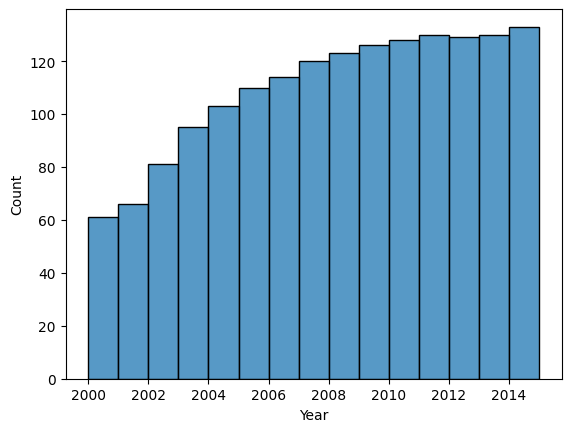

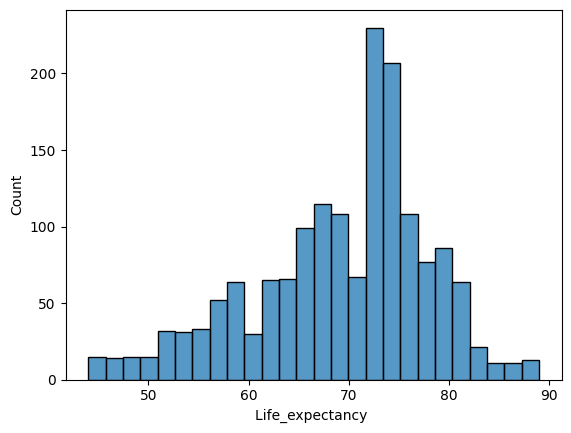

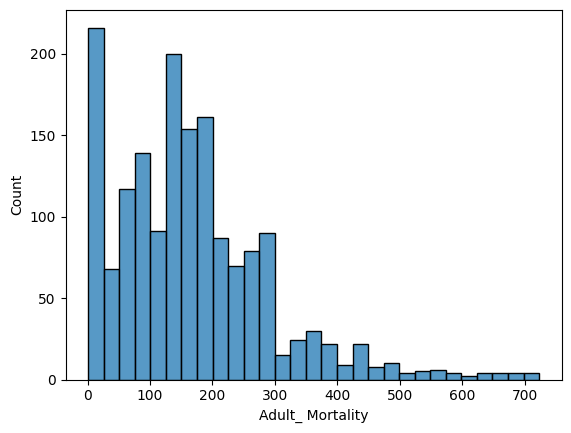

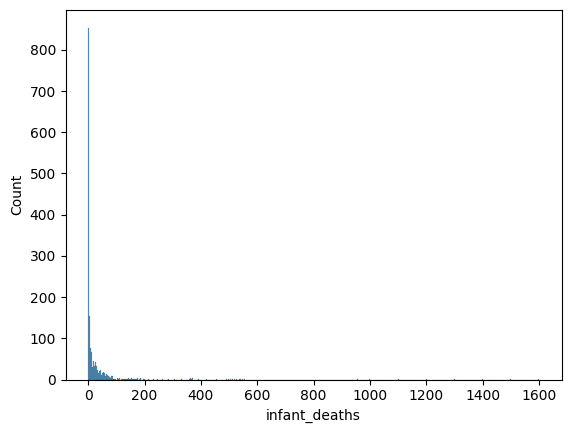

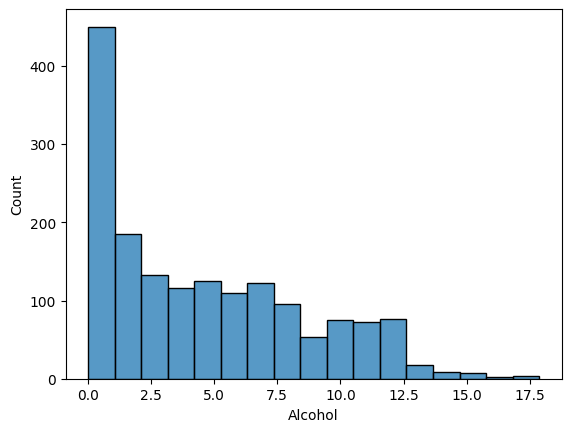

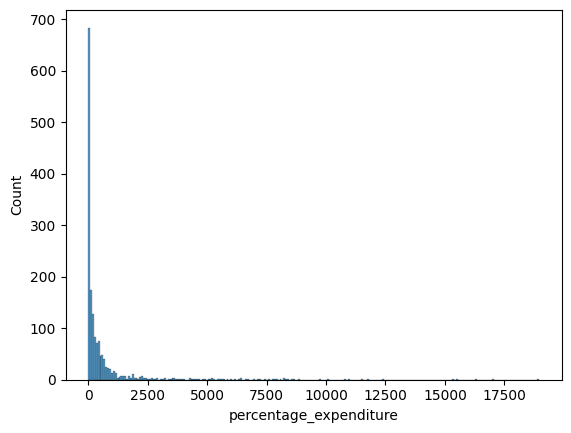

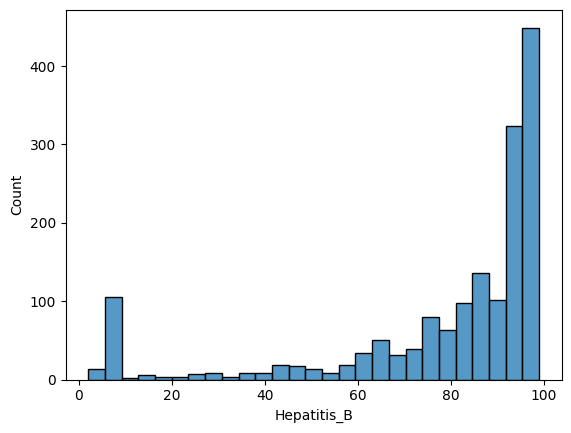

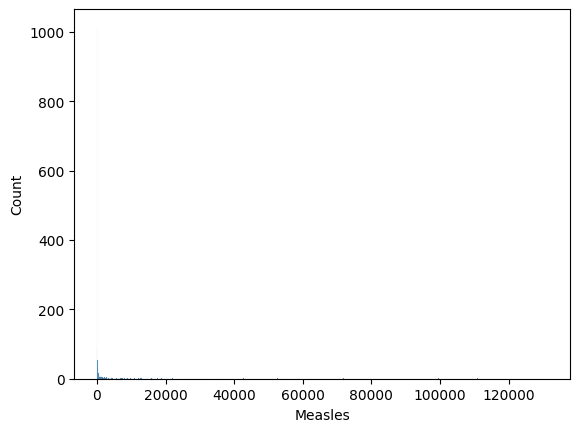

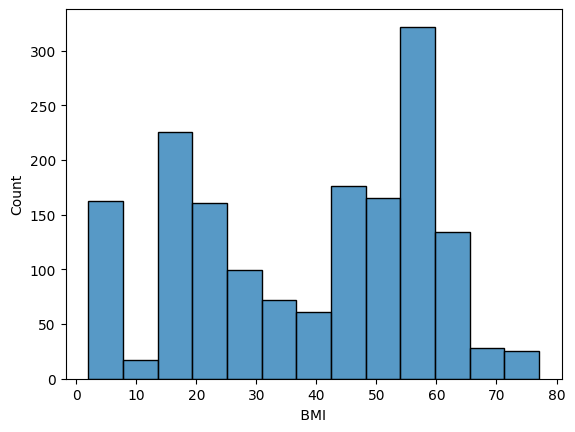

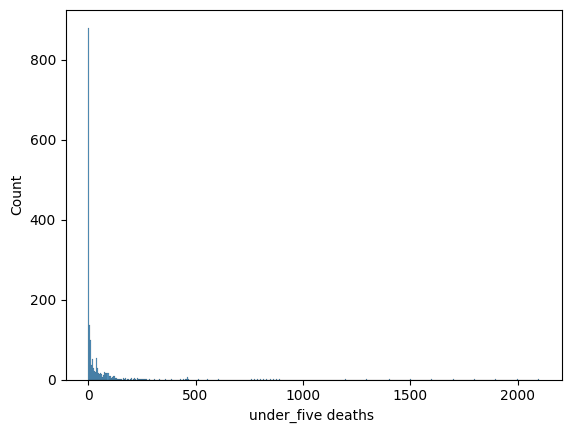

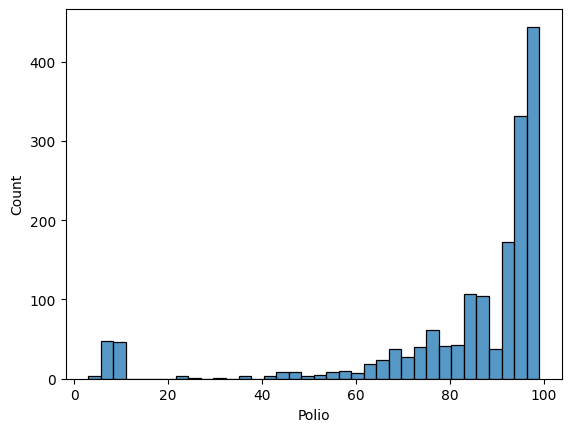

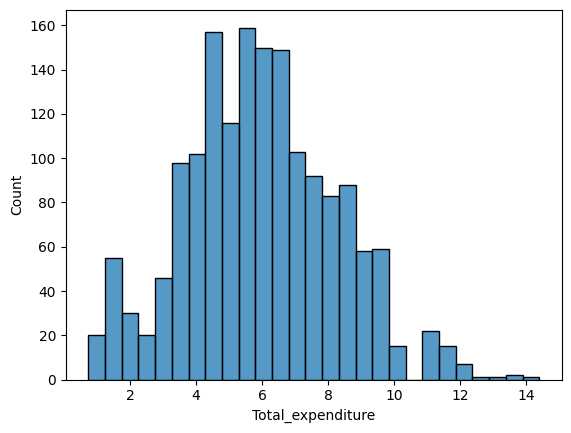

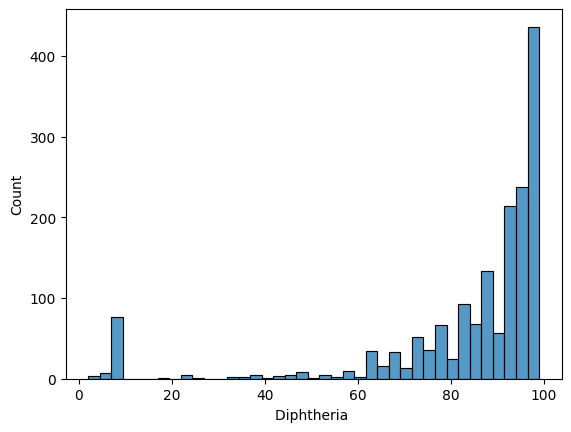

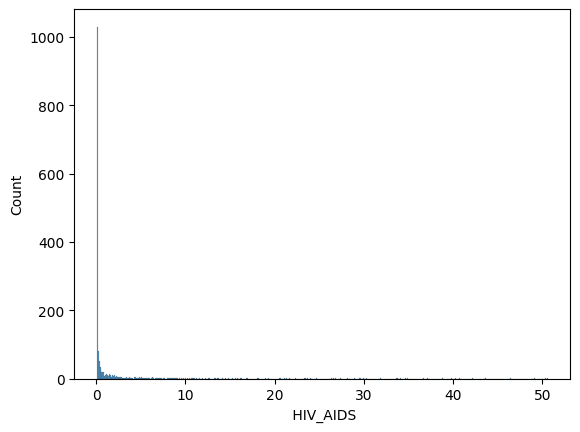

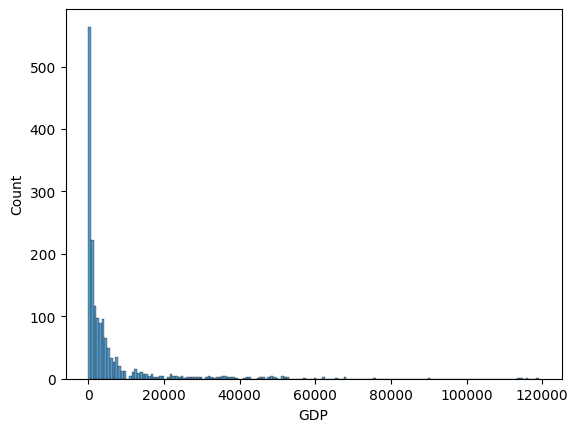

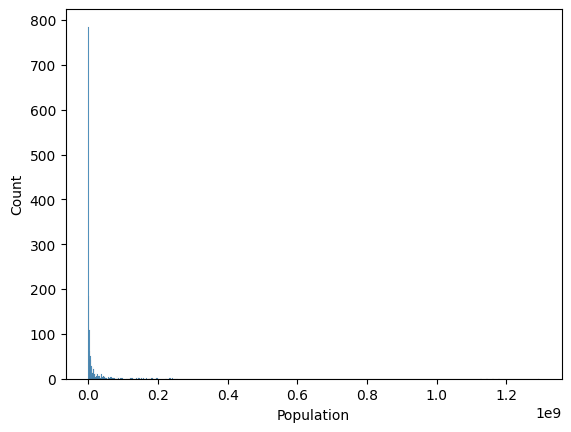

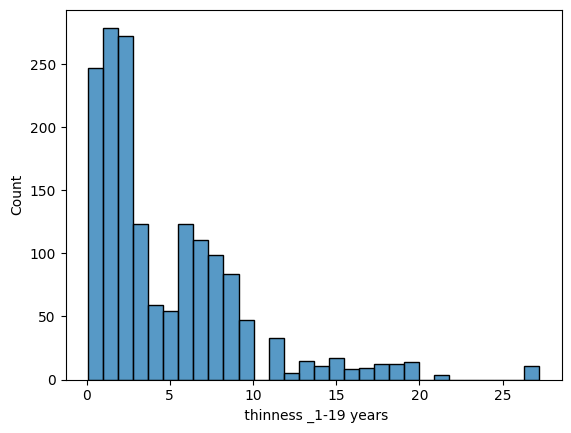

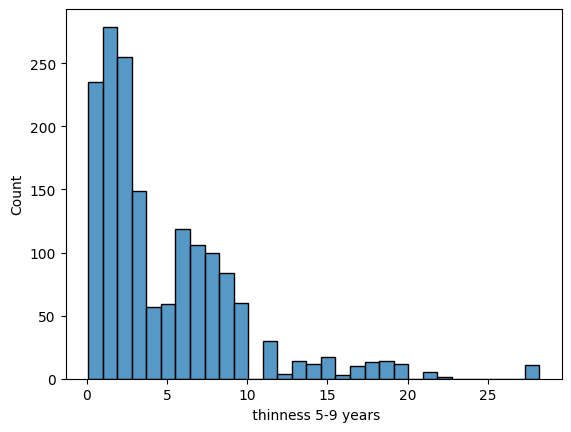

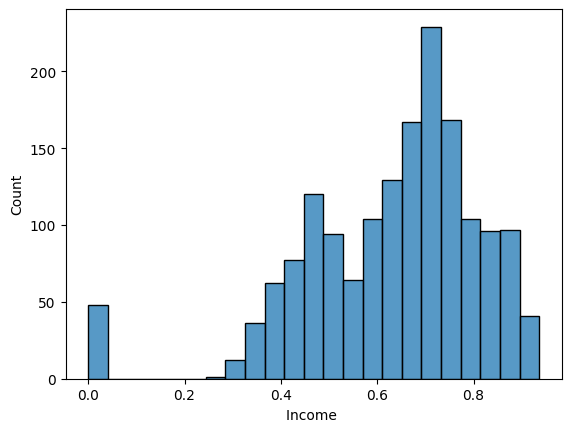

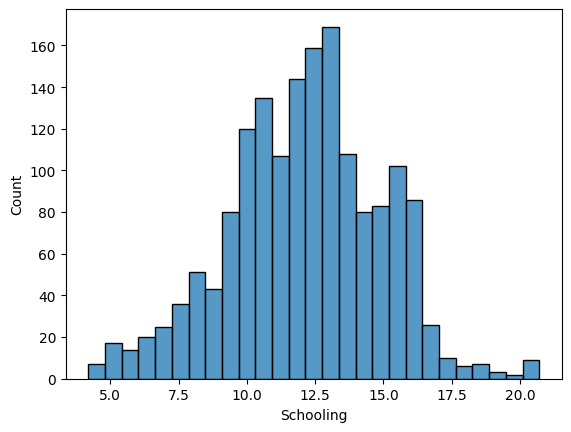

In [9]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.histplot(x=df[i])
        plt.show()

### KDE Plot

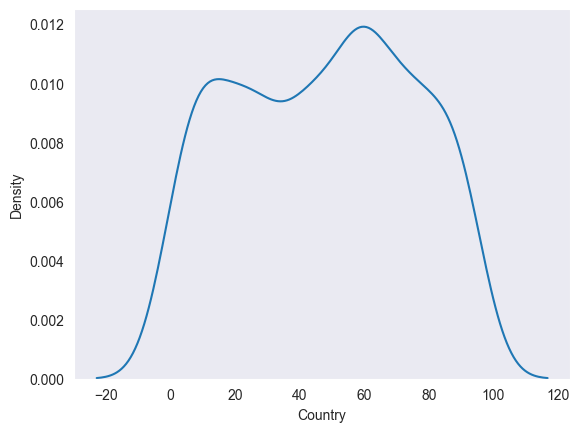

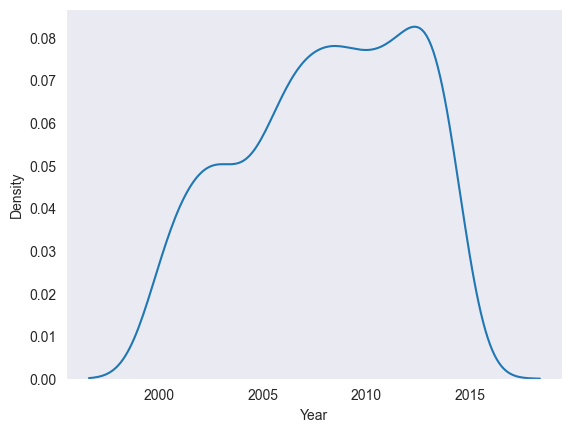

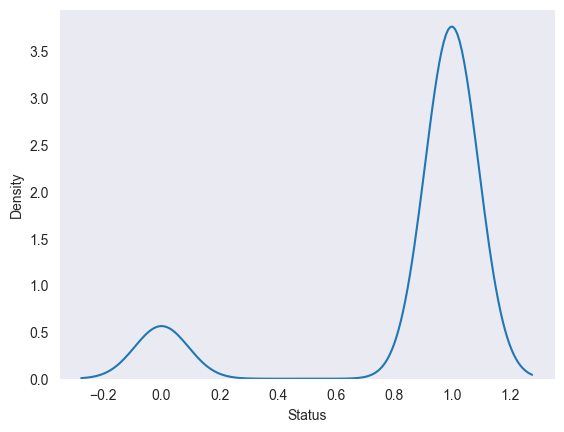

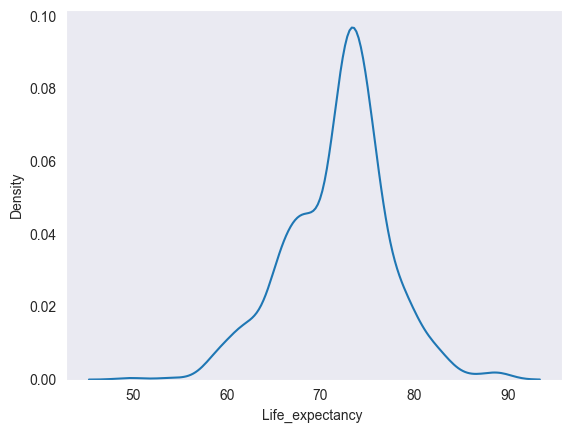

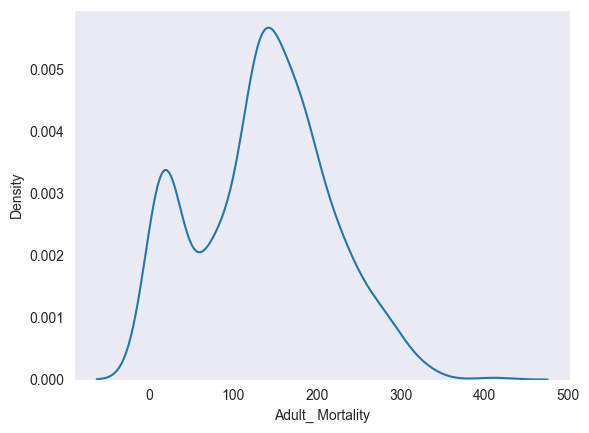

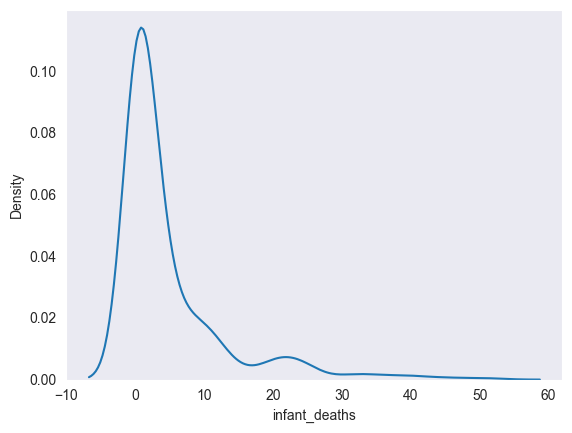

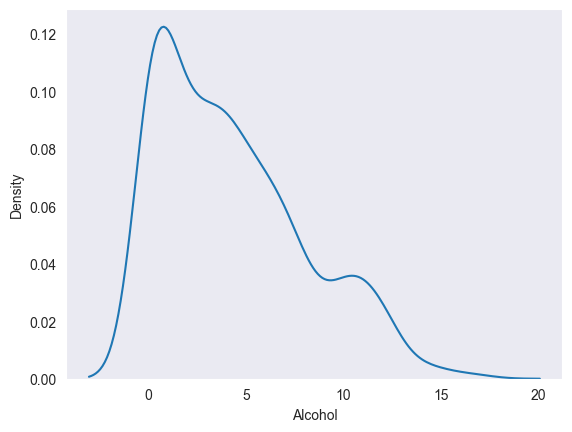

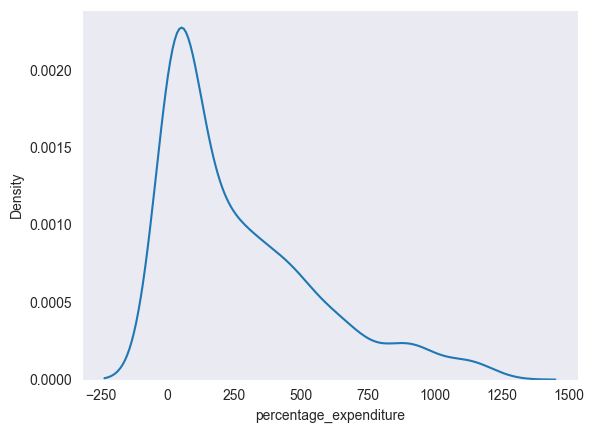

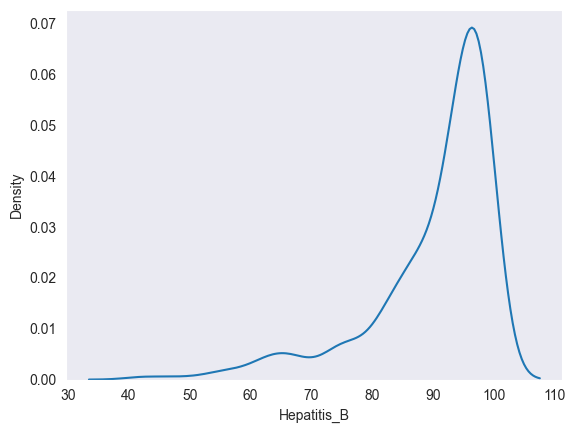

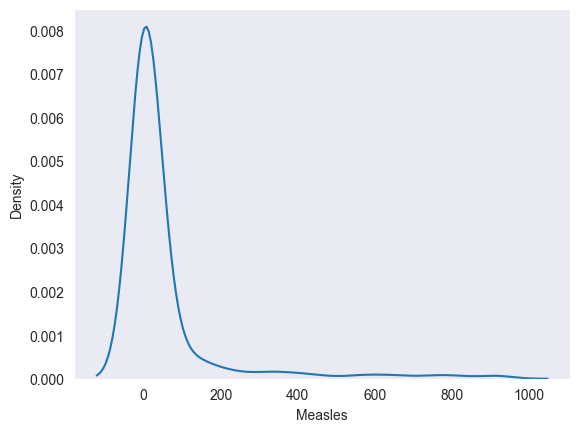

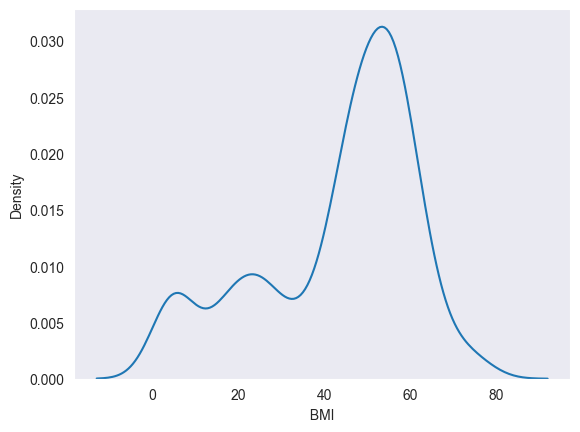

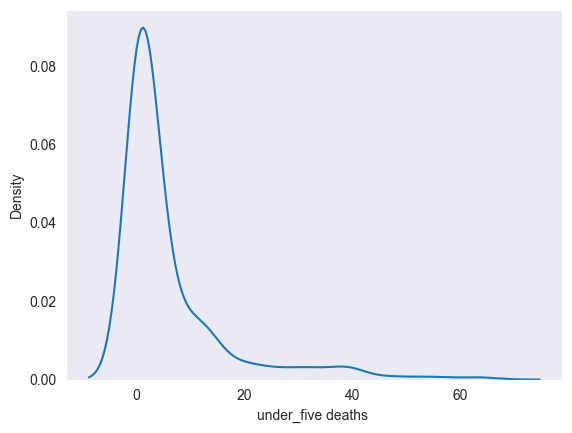

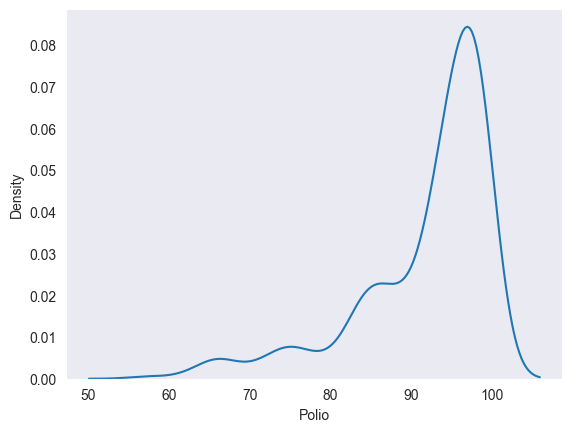

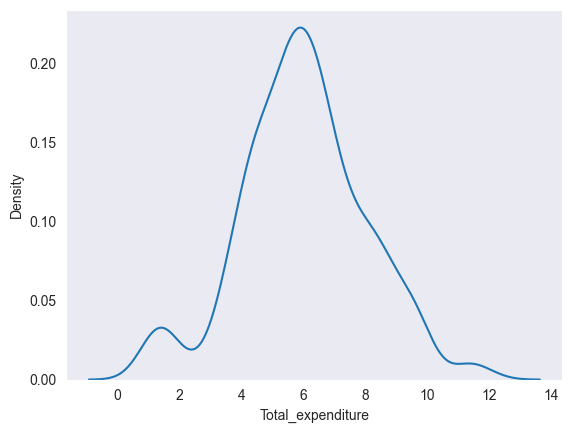

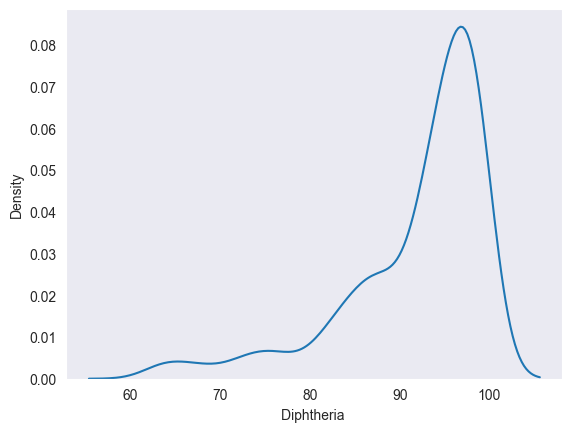

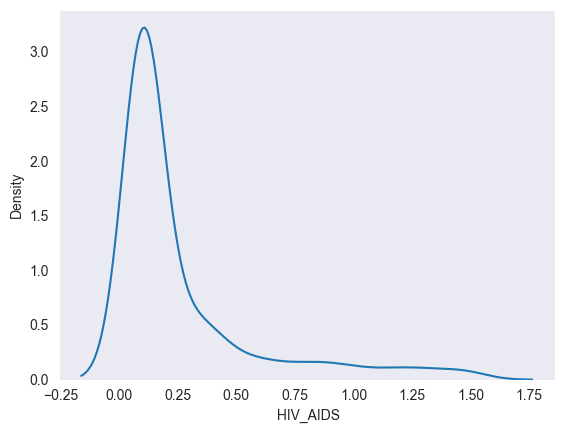

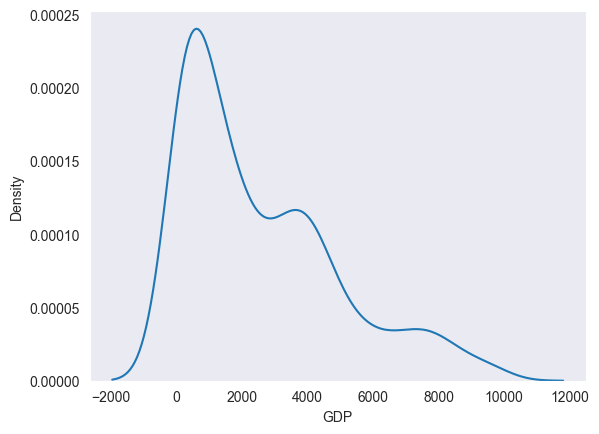

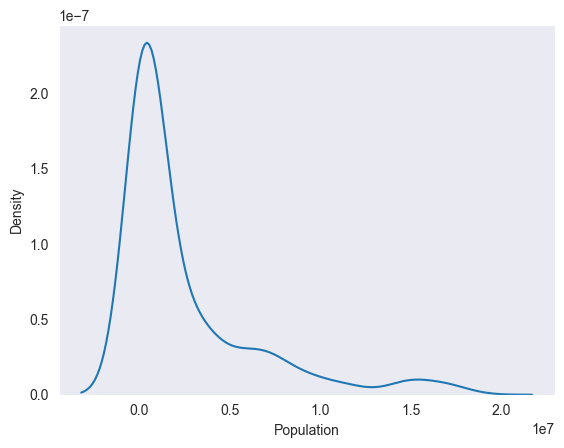

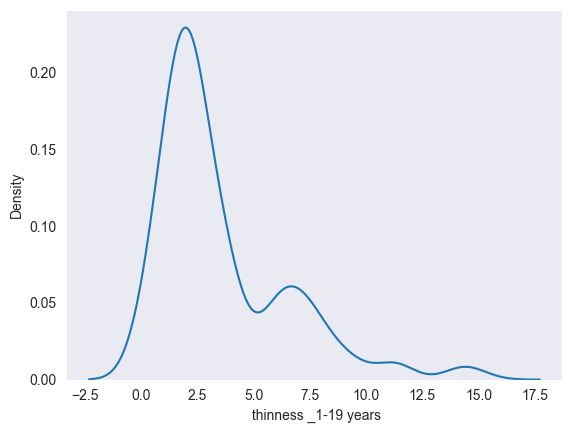

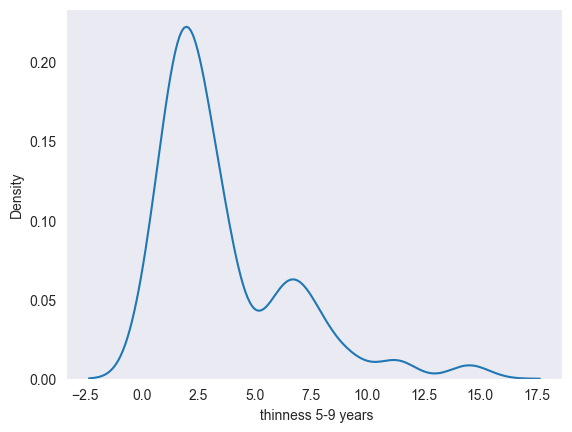

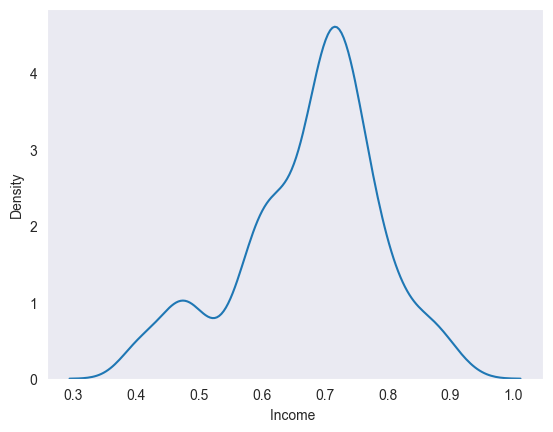

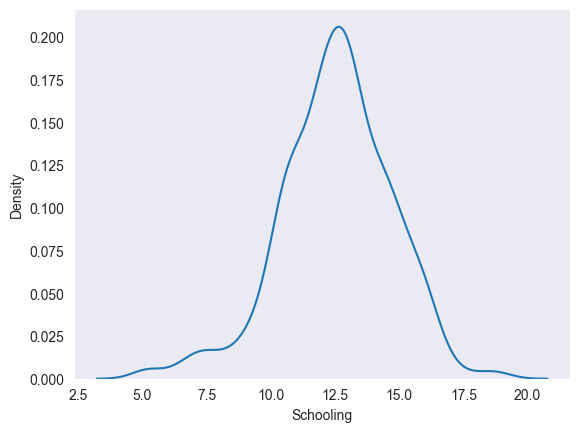

In [40]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.kdeplot(x=df[i])
        plt.show()

### Box Plot

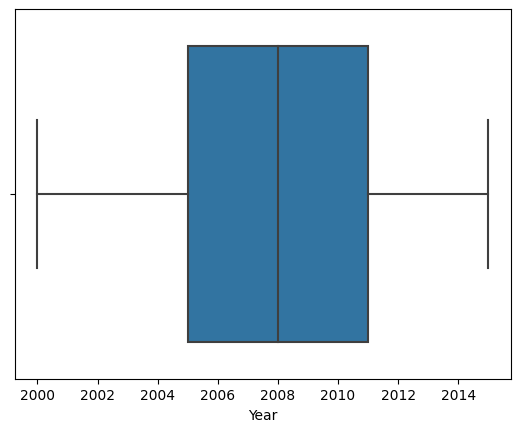

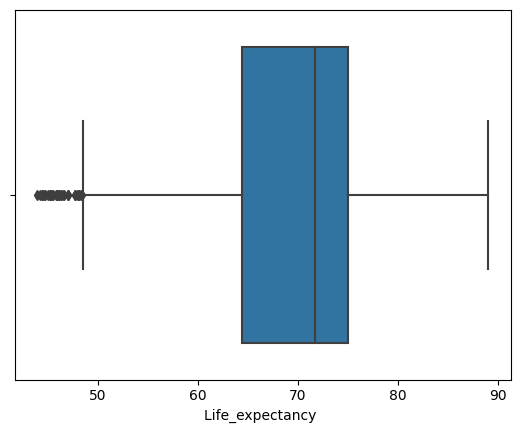

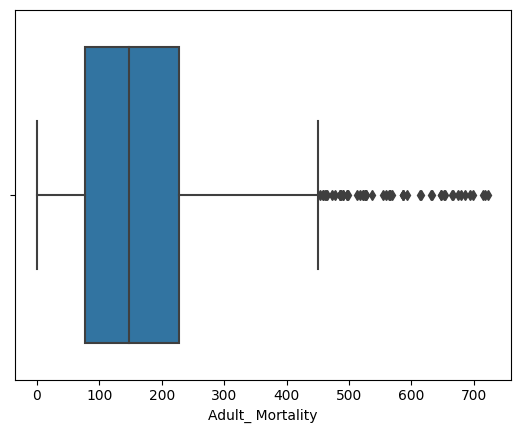

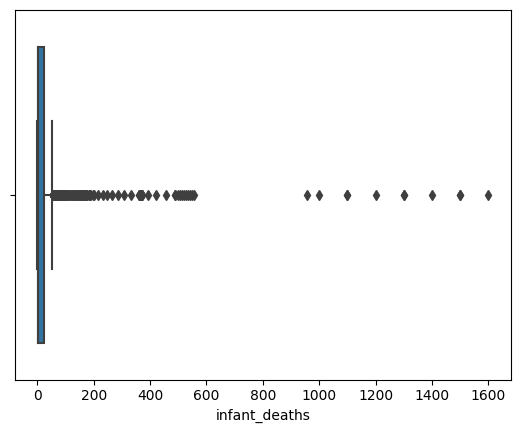

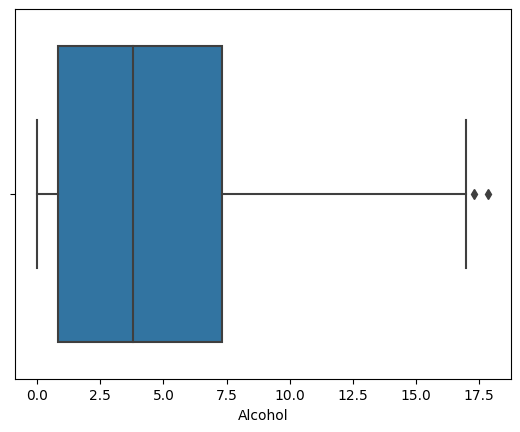

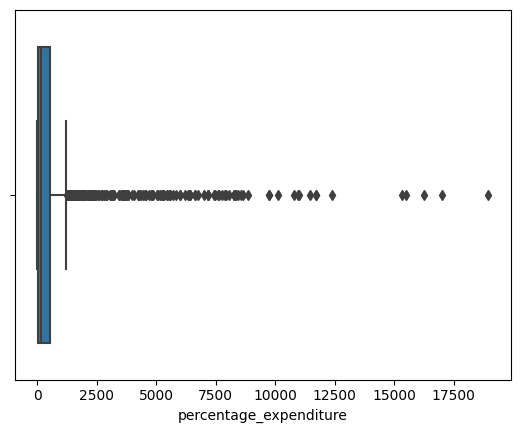

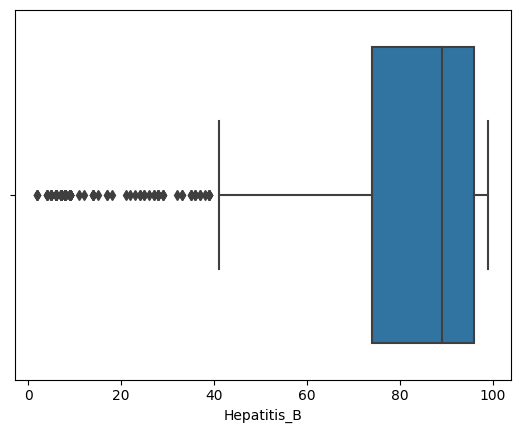

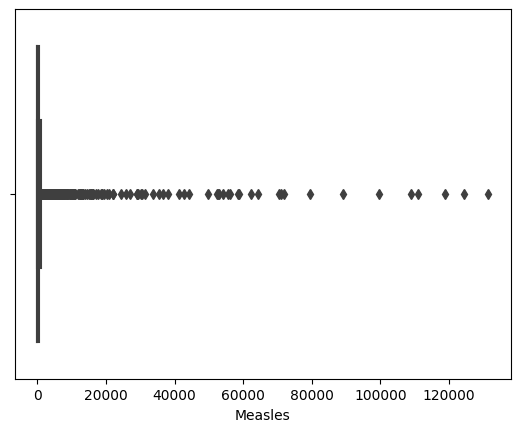

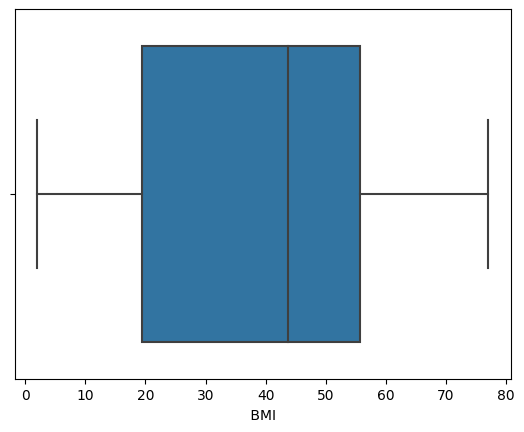

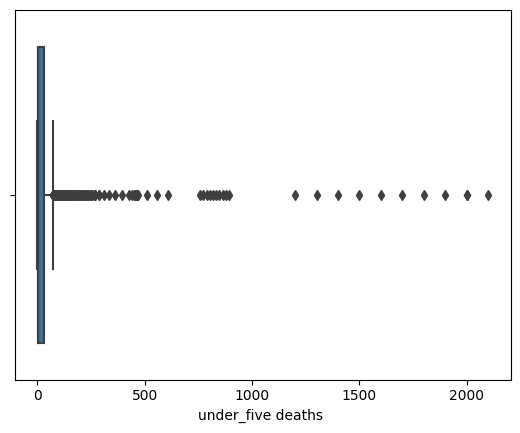

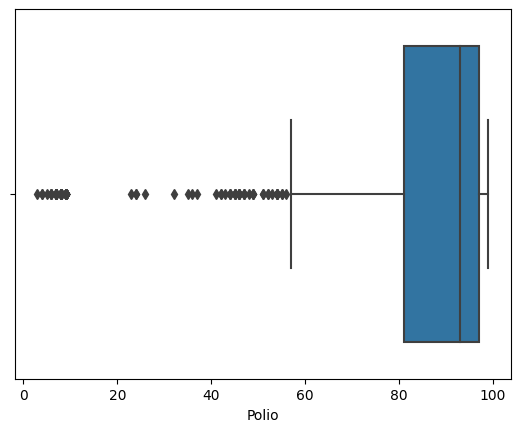

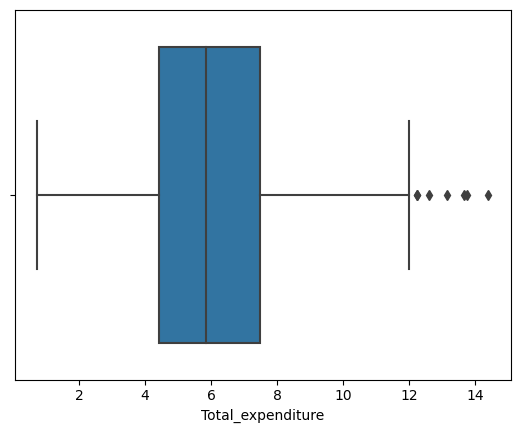

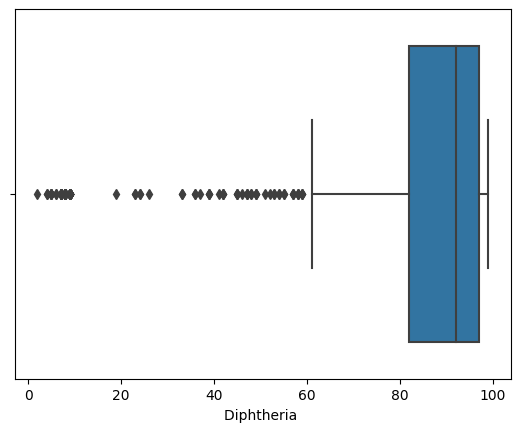

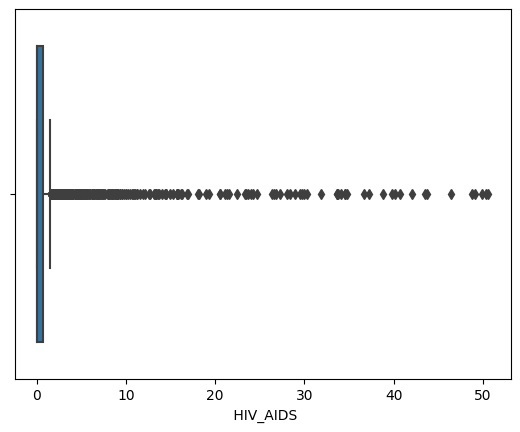

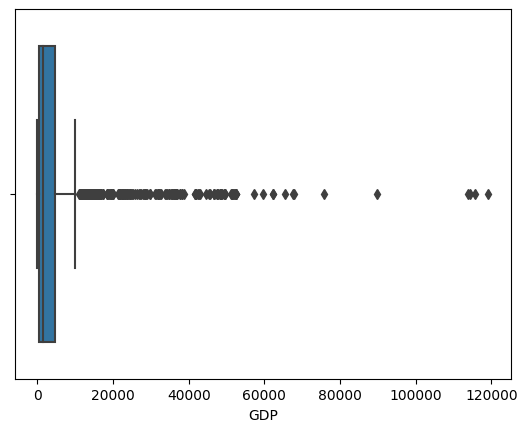

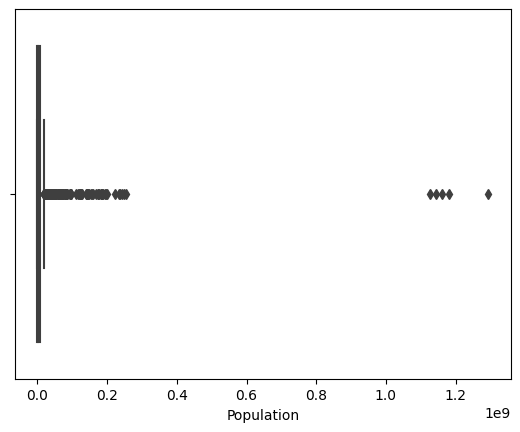

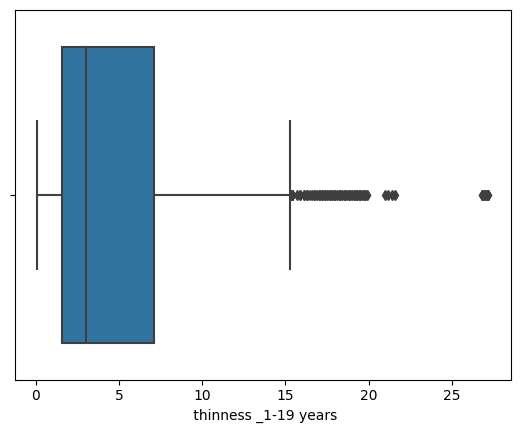

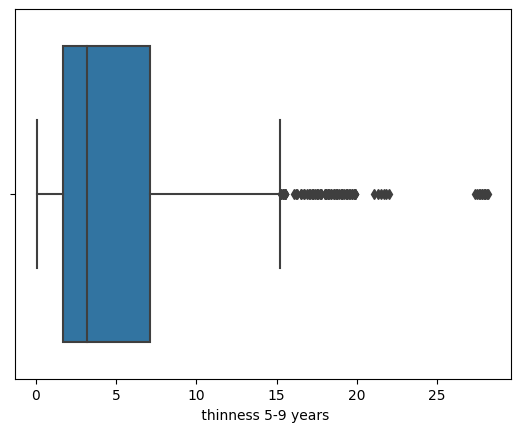

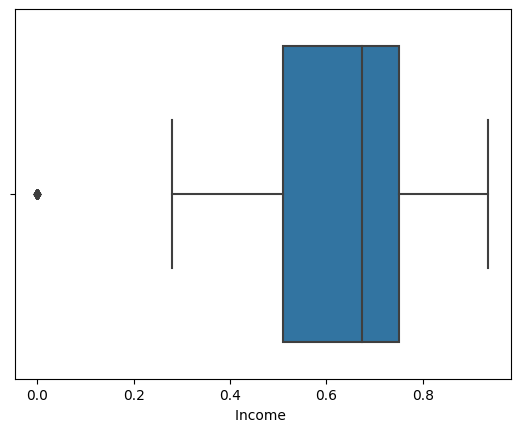

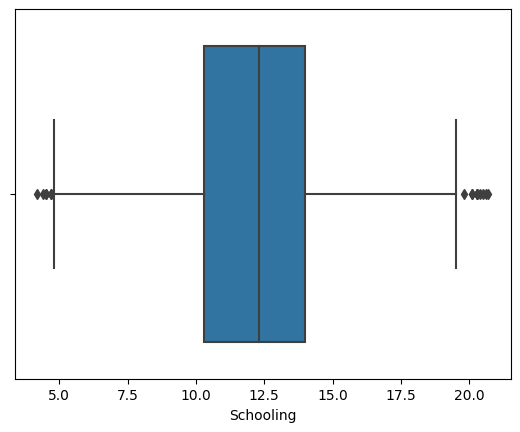

In [11]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i])
        plt.show()

### Outlier Treatment

In [41]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [42]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

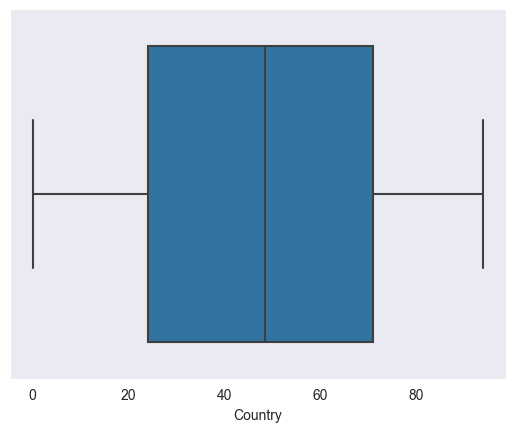

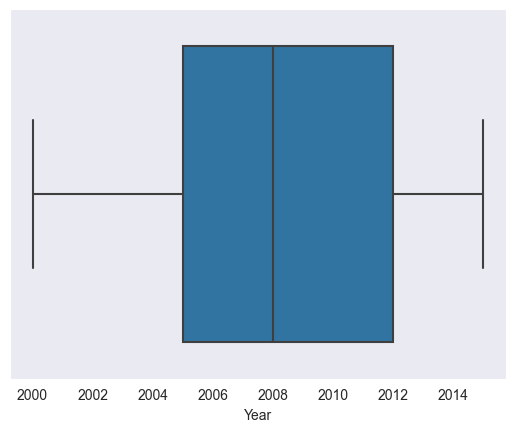

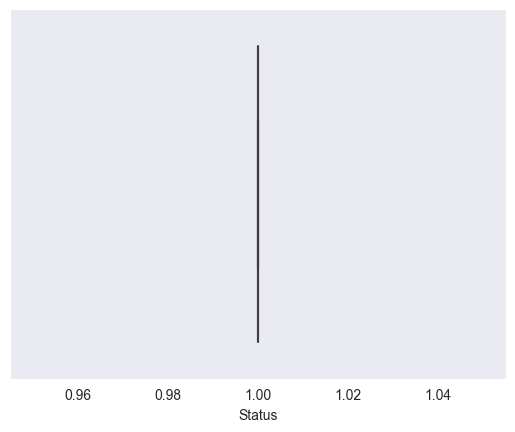

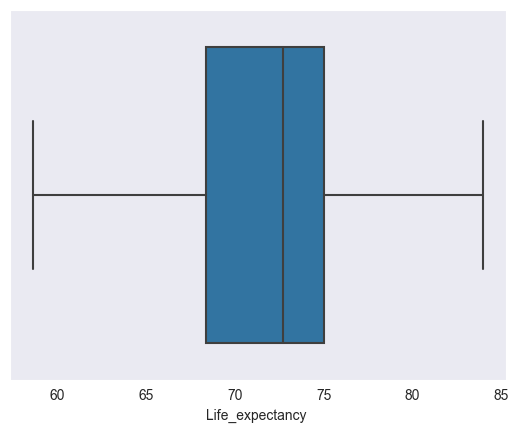

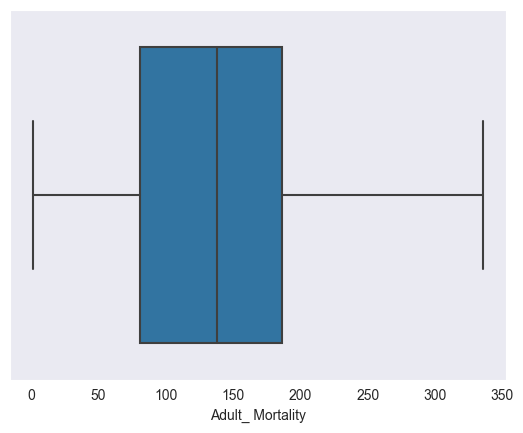

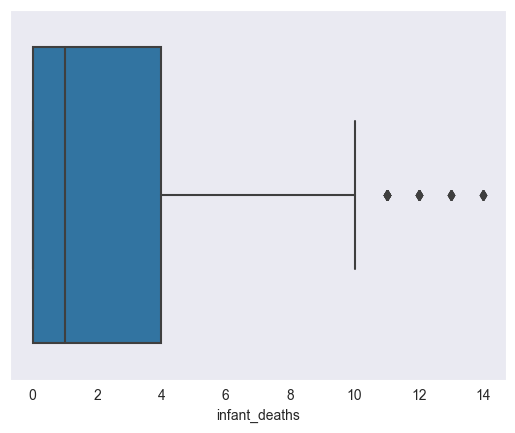

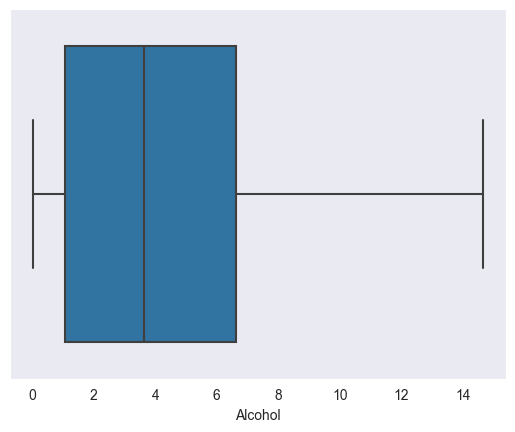

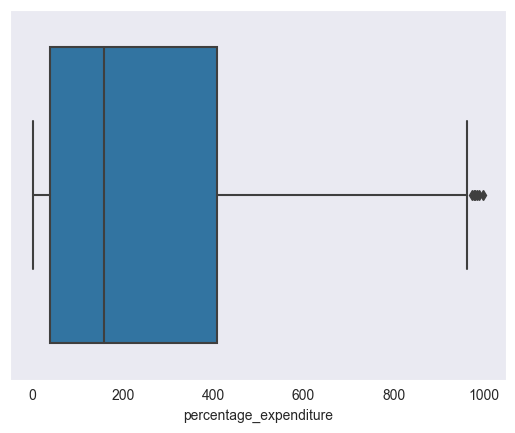

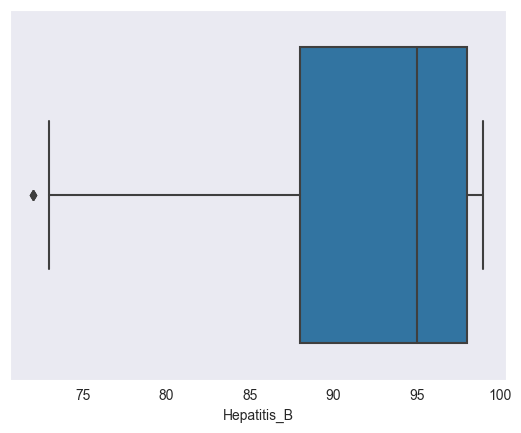

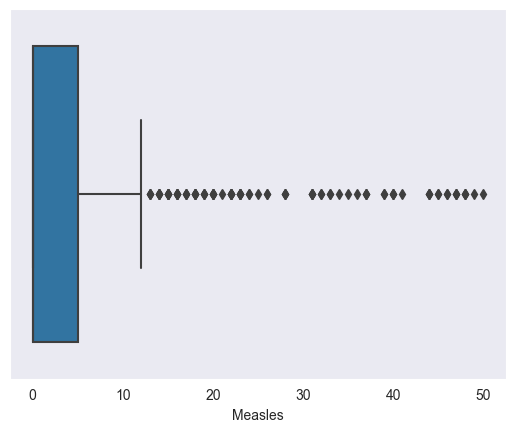

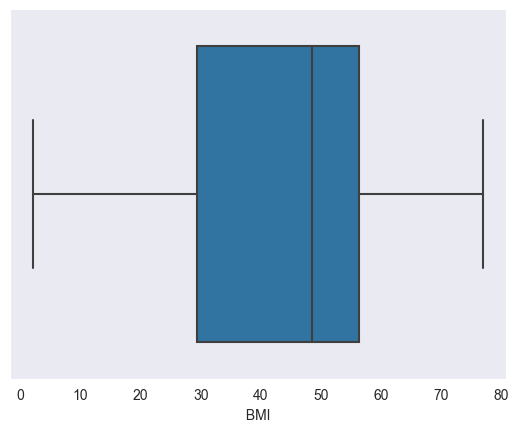

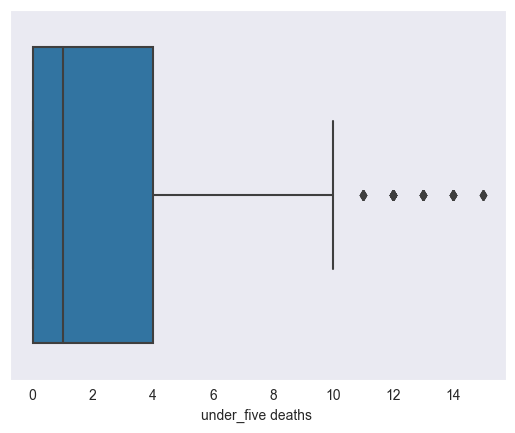

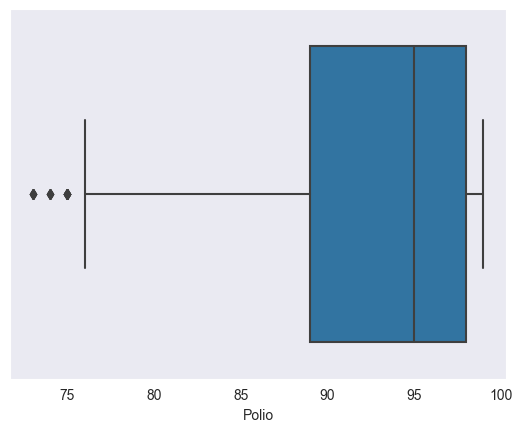

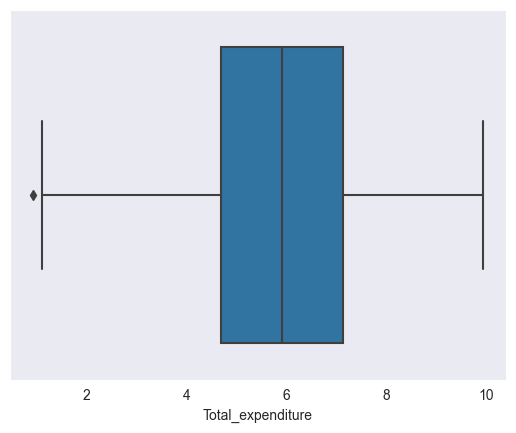

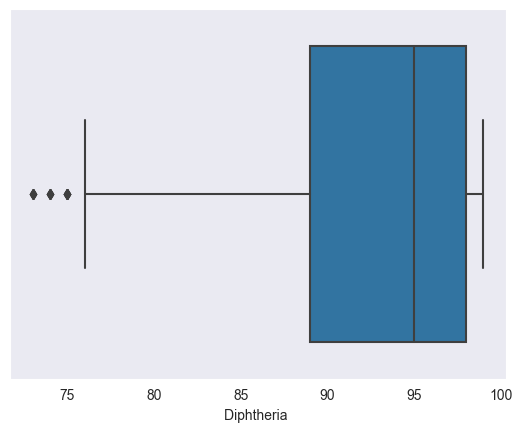

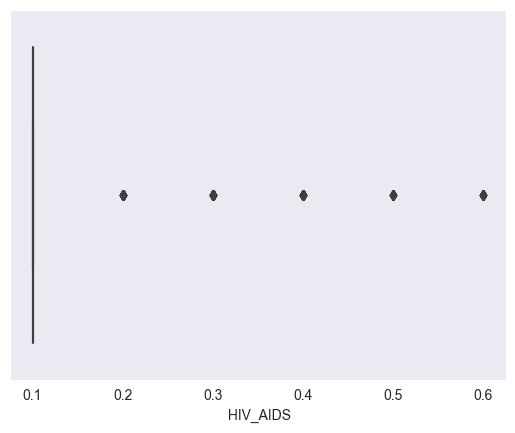

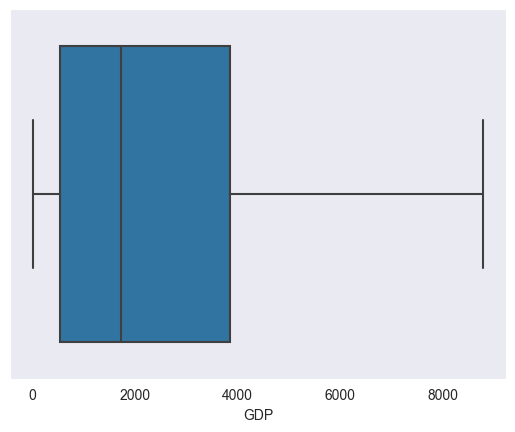

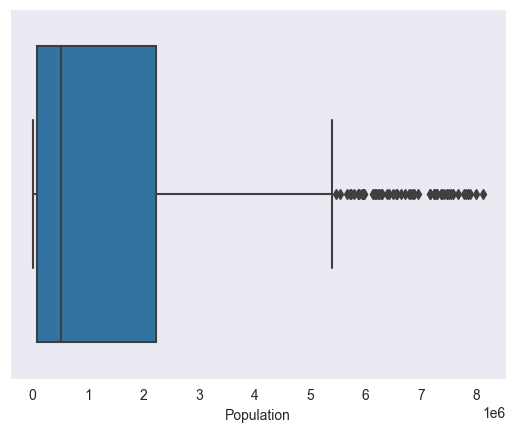

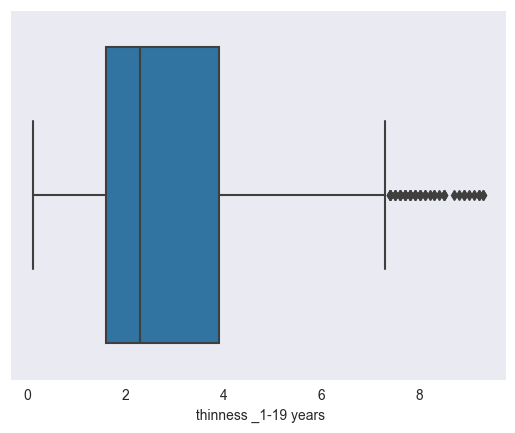

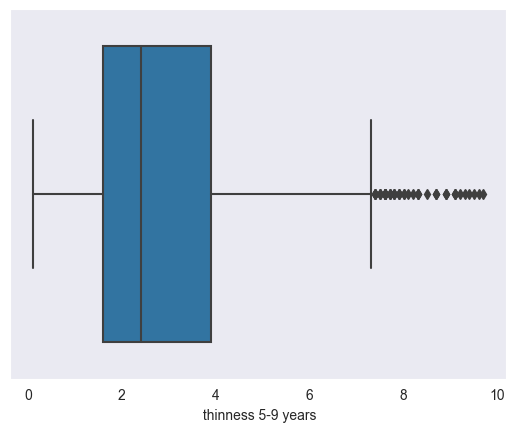

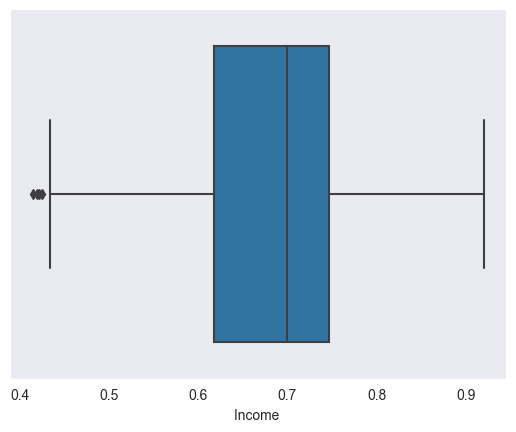

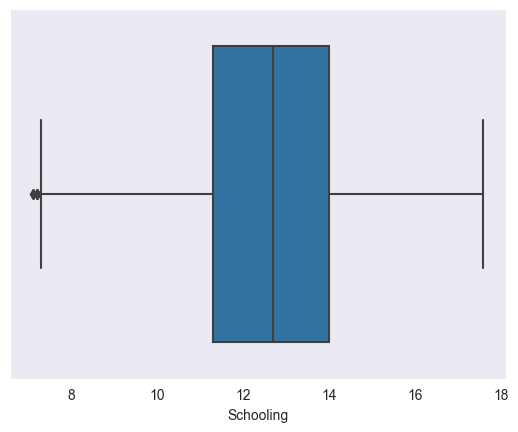

In [43]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i])
        plt.show()

In [44]:
df.dropna(inplace=True)

### Plotting the Box Plot after the Outlier Treatment


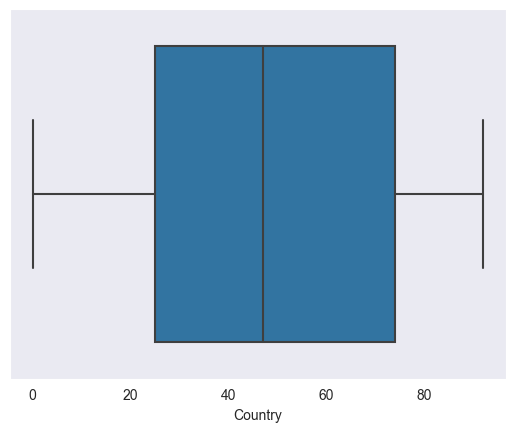

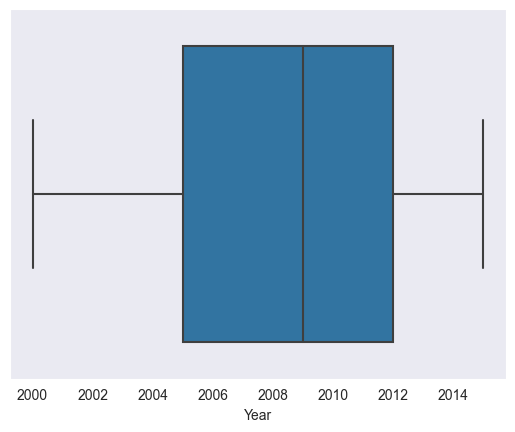

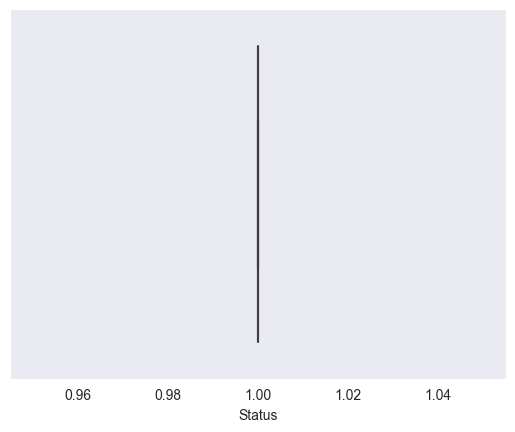

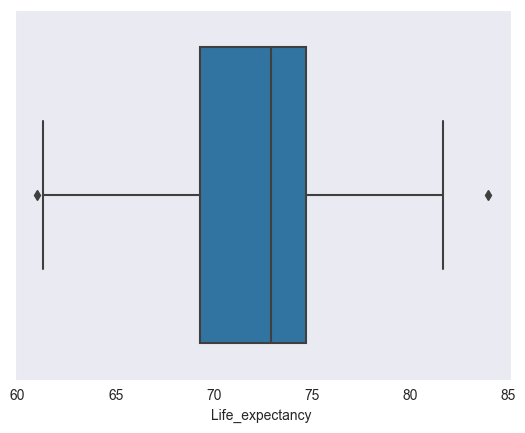

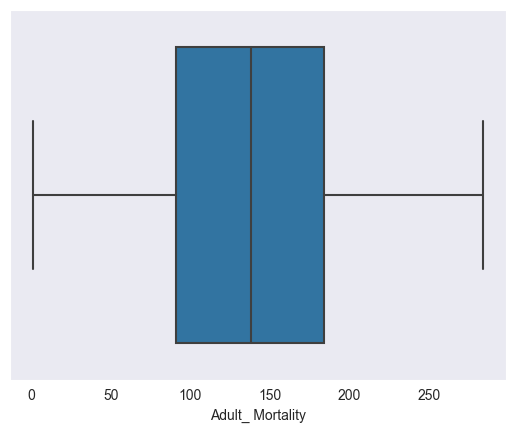

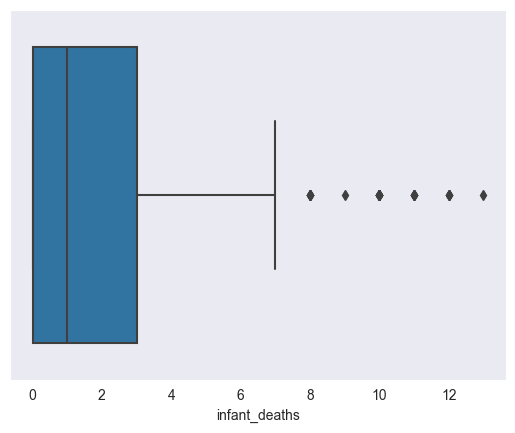

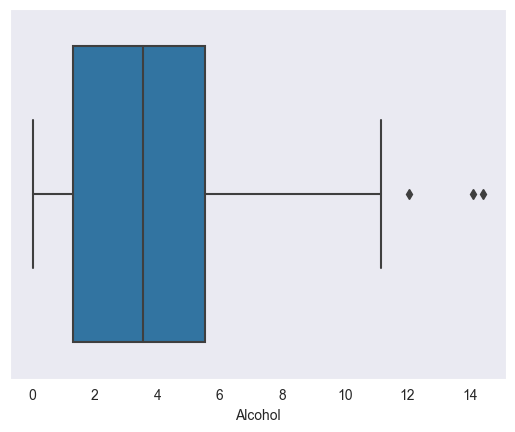

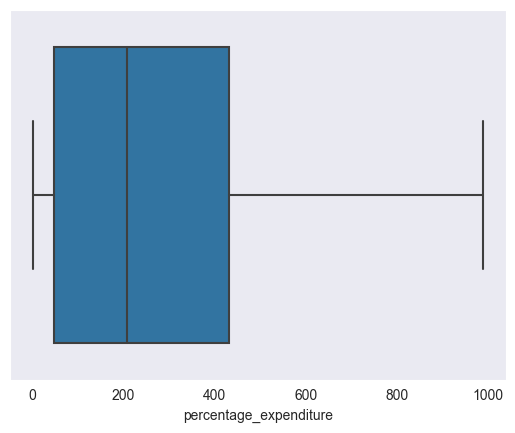

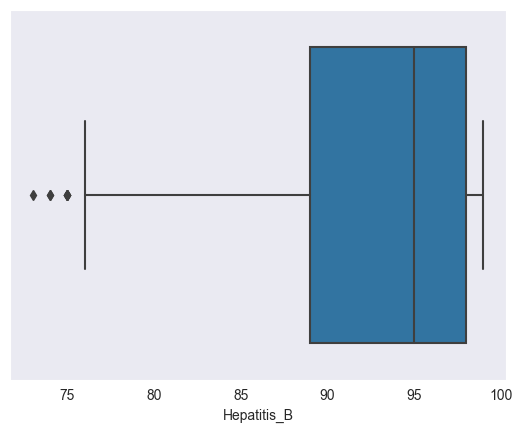

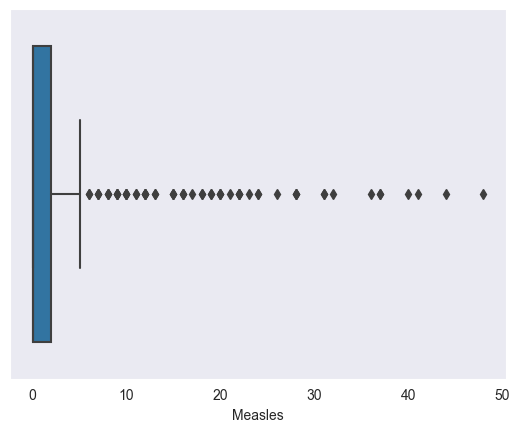

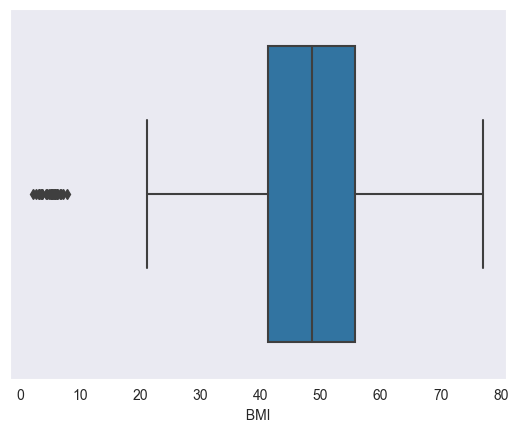

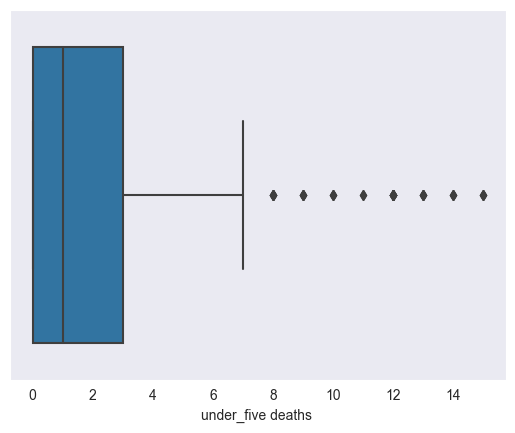

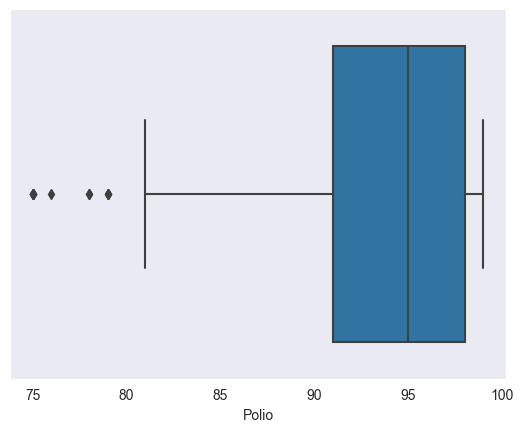

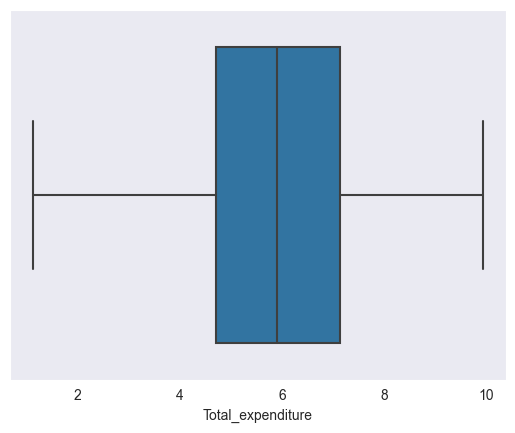

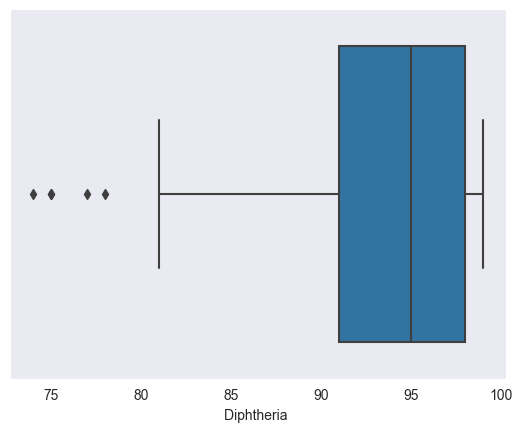

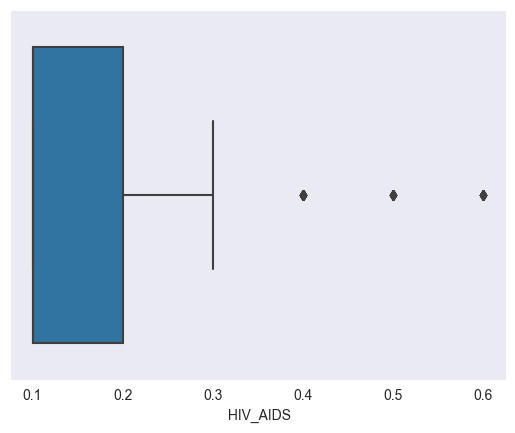

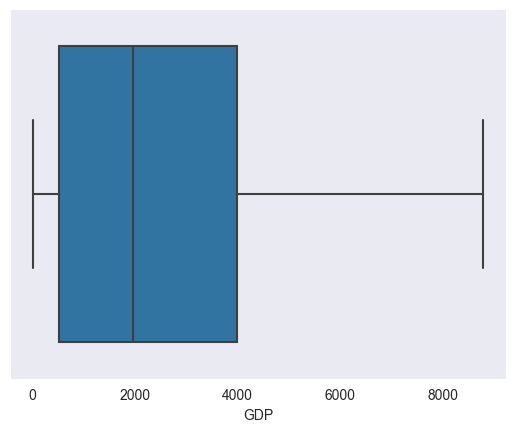

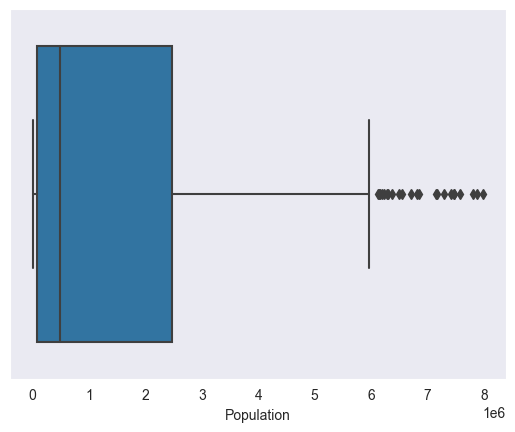

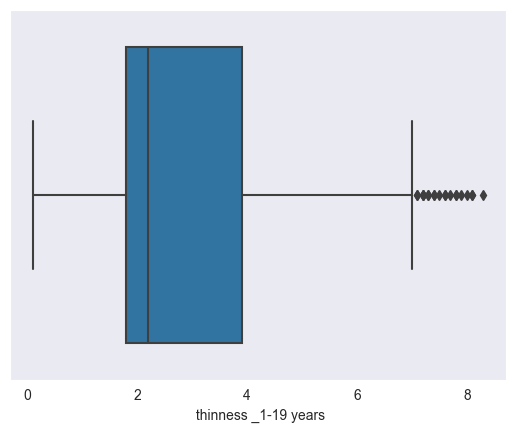

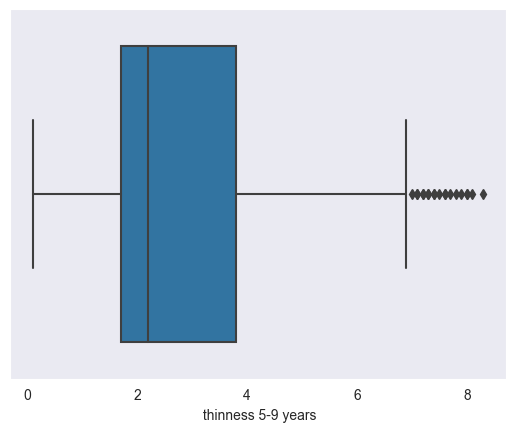

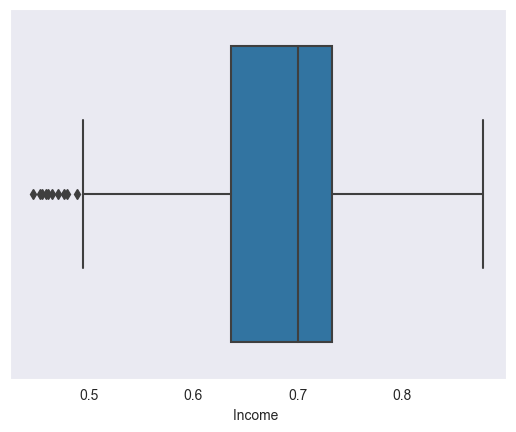

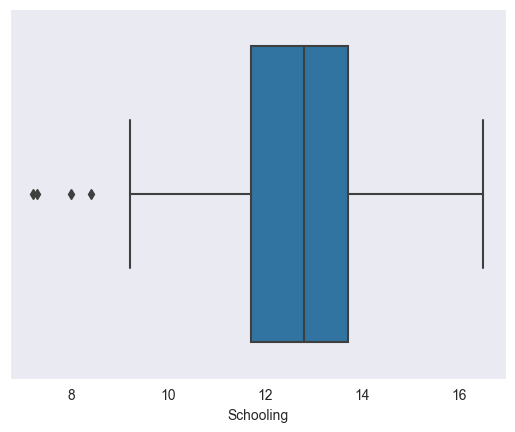

In [46]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i])
        plt.show()

In [48]:
df.dropna(inplace=True)

# Multivariate Analysis

### Bar Plot

Text(0.5, 1.0, 'Income over life expectancy')

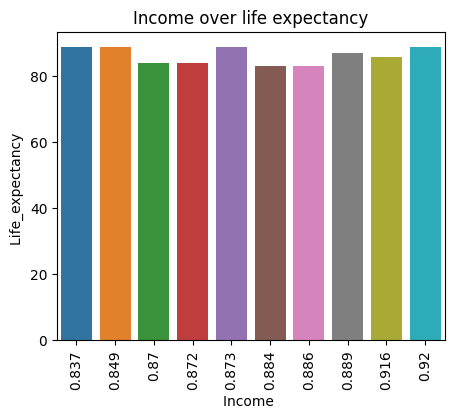

In [17]:
plt.figure(figsize=(5,4))
sns.barplot(x='Income ',y='Life_expectancy ',data=df.sort_values(by='Life_expectancy ',ascending=False)[:10]);
plt.xticks(rotation=90)
plt.title('Income over life expectancy')

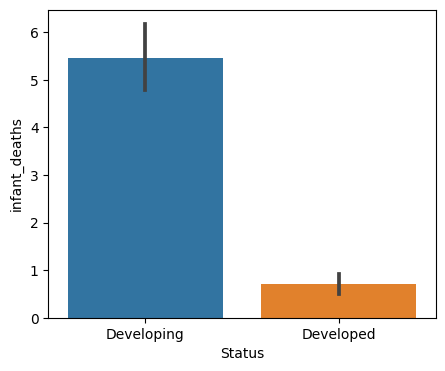

In [18]:
plt.figure(figsize=(5,4))
sns.barplot(x='Status',y='infant_deaths',data=df.sort_values(by='Status',ascending=False))
plt.show()

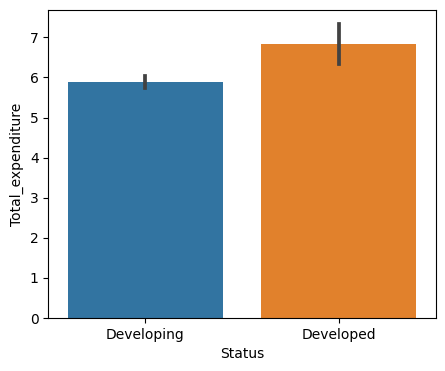

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x='Status',y='Total_expenditure',data=df.sort_values(by='Status',ascending=False))
plt.show()

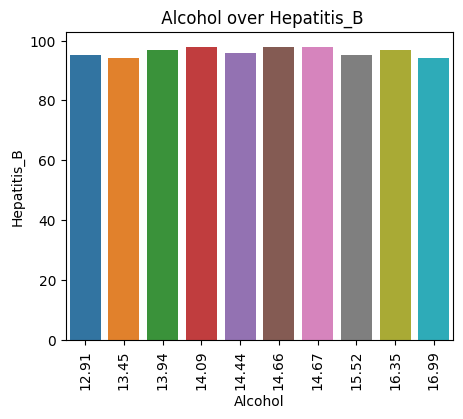

In [20]:
plt.figure(figsize=(5,4))
sns.barplot(x='Alcohol',y='Hepatitis_B',data=df.sort_values(by='Alcohol',ascending=False)[:10]);
plt.title(' Alcohol over Hepatitis_B')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'schooling over life expectancy')

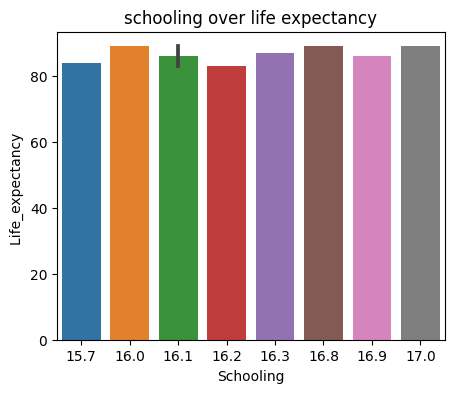

In [21]:
plt.figure(figsize=(5,4))
sns.barplot(x='Schooling',y='Life_expectancy ',data=df.sort_values(by='Life_expectancy ',ascending=False)[:10]);
plt.title('schooling over life expectancy')

### Scatter Plot

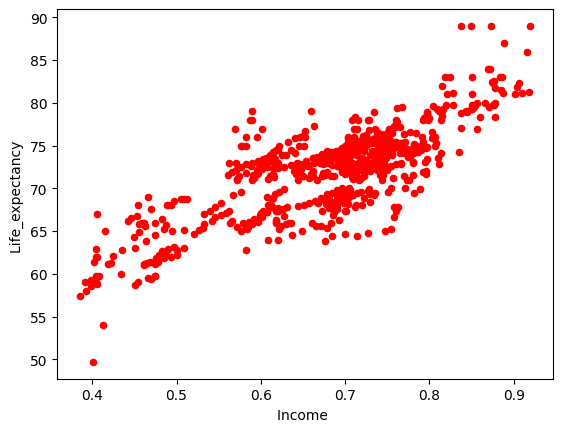

In [22]:
df.plot.scatter(x="Income ",y='Life_expectancy ',color="red");

### Violin Plot

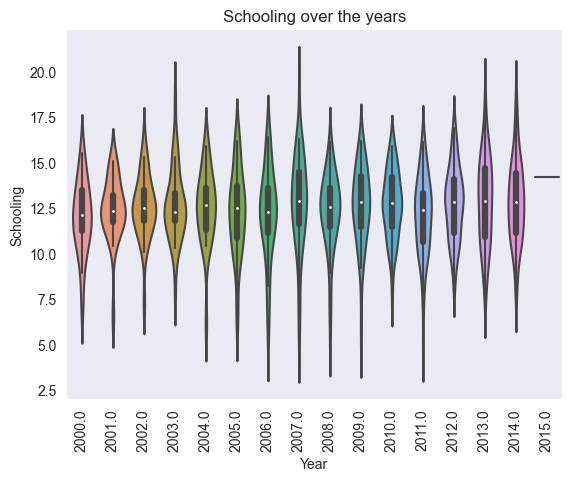

In [23]:
sns.set_style('dark')
sns.violinplot(x='Year',y='Schooling',figsize=(30,20),data=df.sort_values(by='Schooling',ascending=False))
plt.title('Schooling over the years')
plt.xticks(rotation=90)
plt.show()

### Pair Plot

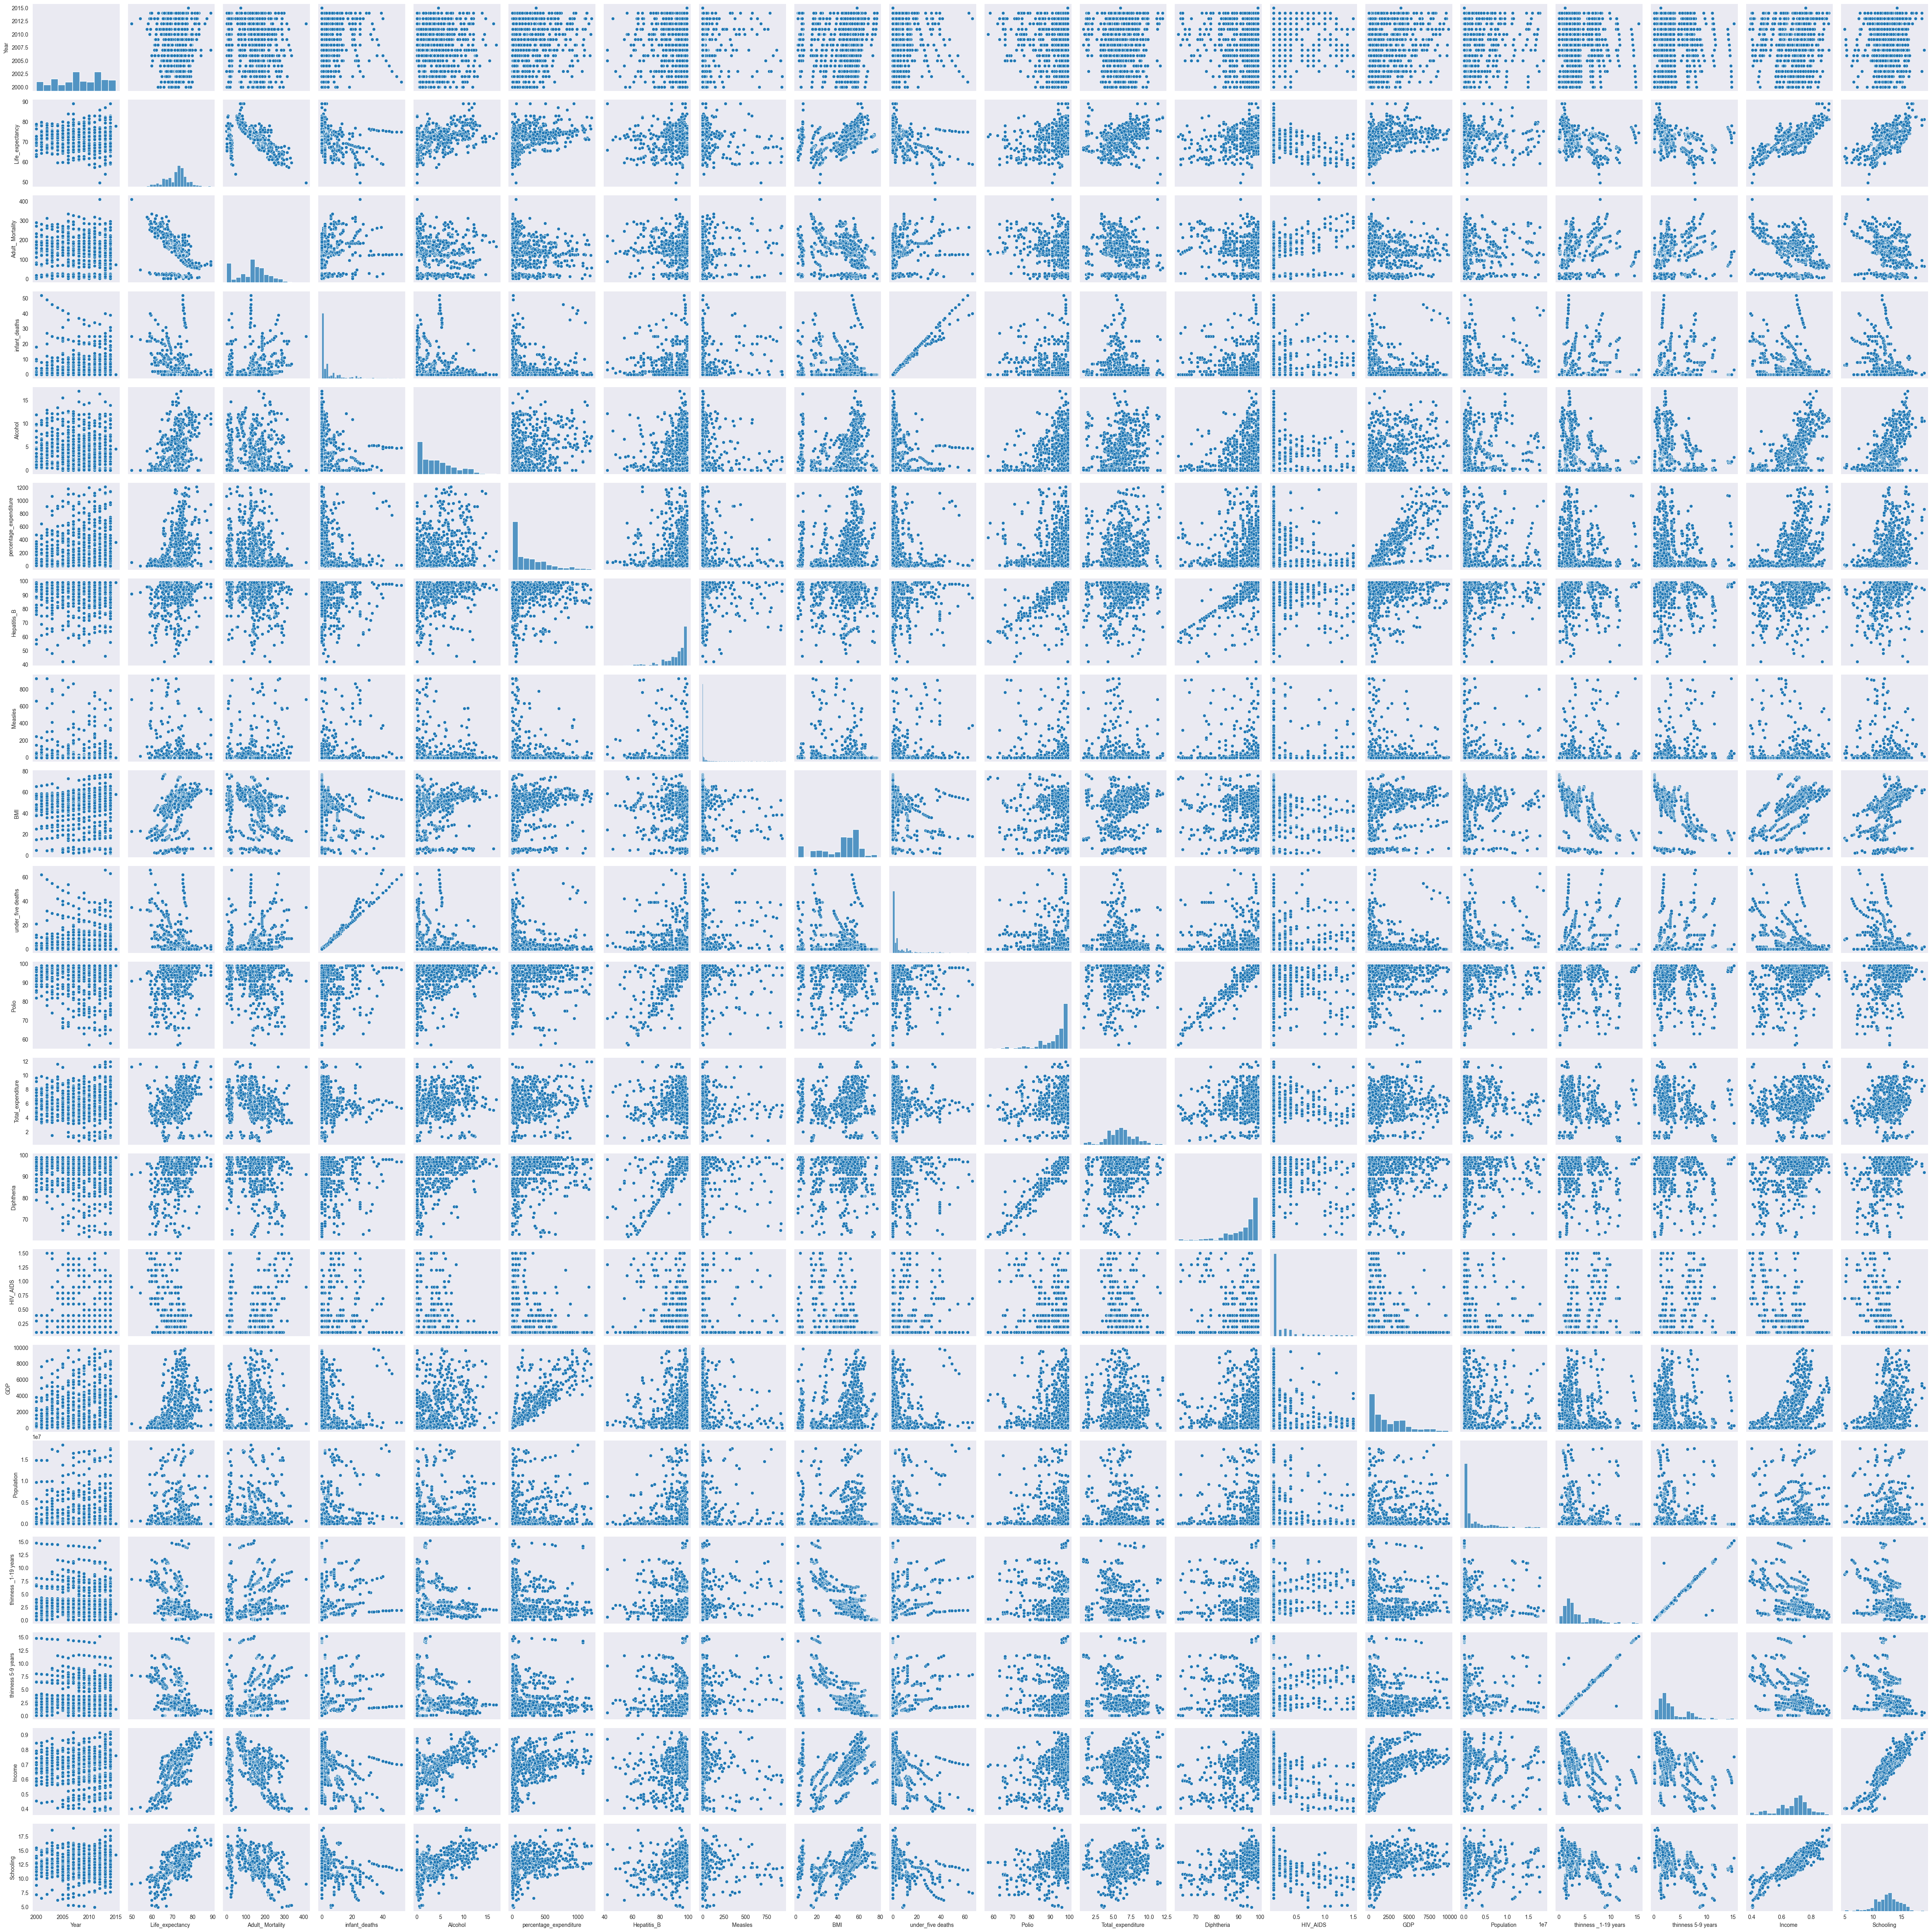

In [24]:
sns.pairplot(data=df)
plt.show()

### Line Plot

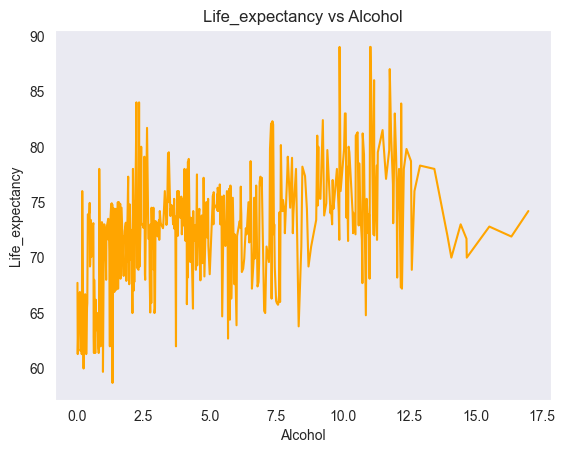

In [25]:
sns.lineplot(data=df,x='Alcohol',y='Life_expectancy ',color="orange",ci=None)
plt.title('Life_expectancy vs Alcohol' );

### Label Encoding the Catagorical Columns

In [49]:
le=LabelEncoder()
df["Country"]=le.fit_transform(df["Country"])
df['Status']=le.fit_transform(df['Status'])
df

Country    Year  Status  Life_expectancy   Adult_ Mortality  \
16          0  2015.0       0              77.8              74.0   
17          0  2014.0       0              77.5               8.0   
18          0  2013.0       0              77.2              84.0   
19          0  2012.0       0              76.9              86.0   
20          0  2011.0       0              76.6              88.0   
...       ...     ...     ...               ...               ...   
2817       45  2008.0       0              76.4             119.0   
2818       45  2007.0       0              75.4             124.0   
2822       45  2003.0       0              75.4             121.0   
2823       45  2002.0       0              75.4             124.0   
2824       45  2001.0       0              75.2             123.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
16              0.0     4.60              364.975229         99.0      0.0   
17              0.0     4.51              428.749067         98.0      0.0   
18              0.0     4.76              430.876979         99.0      0.0   
19              0.0     5.14              412.443356         99.0      9.0   
20              0.0     5.37              437.062100         99.0     28.0   
...             ...      ...                     ...          ...      ...   
2817            1.0     6.76               24.731423         94.0      0.0   
2818            1.0     6.67               14.473059         94.0      0.0   
2822            1.0     5.11              160.840014         91.0      0.0   
2823            1.0     5.86               27.468810         95.0      0.0   
2824            1.0     6.48              421.480428         94.0      0.0   

      ...  Polio  Total_expenditure  Diphtheria    HIV_AIDS          GDP  \
16    ...   99.0               6.00         99.0        0.1  3954.227830   
17    ...   98.0               5.88         98.0        0.1  4575.763787   
18    ...   99.0               5.66         99.0        0.1  4414.723140   
19    ...   99.0               5.59         99.0        0.1  4247.614380   
20    ...   99.0               5.71         99.0        0.1  4437.178680   
...   ...    ...                ...          ...        ...          ...   
2817  ...   94.0               8.17         94.0        0.1   962.312164   
2818  ...   94.0               8.23         94.0        0.1    79.697460   
2822  ...   91.0               6.52         91.0        0.1  3622.522840   
2823  ...   93.0               7.18         95.0        0.1   488.768855   
2824  ...   94.0               7.46         94.0        0.1  6281.377470   

      Population   thinness _1-19 years   thinness 5-9 years  Income   \
16       28873.0                    1.2                  1.3    0.762   
17      288914.0                    1.2                  1.3    0.761   
18      289592.0                    1.3                  1.4    0.759   
19        2941.0                    1.3                  1.4    0.752   
20      295195.0                    1.4                  1.5    0.738   
...          ...                    ...                  ...      ...   
2817    335824.0                    1.6                  1.5    0.770   
2818   3339741.0                    1.6                  1.5    0.760   
2822   3325637.0                    1.7                  1.6    0.747   
2823   3327773.0                    1.7                  1.7    0.746   
2824    332713.0                    1.8                  1.7    0.742   

      Schooling  
16         14.2  
17         14.2  
18         14.2  
19         14.2  
20         13.3  
...         ...  
2817       15.7  
2818       15.3  
2822       15.0  
2823       14.7  
2824       14.2  

[305 rows x 22 columns]

### Checking the Correlation with the Target 'Life_expectancy'

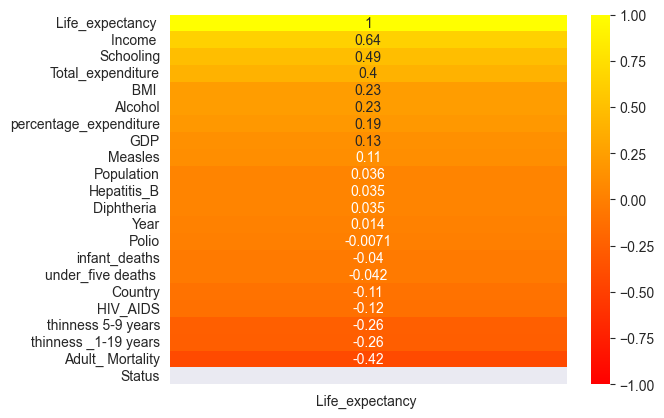

In [50]:
sns.heatmap(df.corr()[["Life_expectancy "]].sort_values(by="Life_expectancy ",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [28]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult_ Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', ' BMI ', 'under_five deaths ', 'Polio', 'Total_expenditure',
       'Diphtheria ', ' HIV_AIDS', 'GDP', 'Population',
       ' thinness _1-19 years', ' thinness 5-9 years', 'Income ', 'Schooling'],
      dtype='object')

### Lets take only the columns with good correlation with the target


In [51]:
x=df[['Income ', 'Schooling', 'Alcohol',"Total_expenditure"]].values

In [52]:
y=df["Life_expectancy "].values

### Feature Scaling

In [53]:
ss=StandardScaler()
x=ss.fit_transform(x)

### Model Building

In [81]:
models = {
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [82]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearSVR
AVERAGE RMSE:  3.323705882082934
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3.9756479717929993
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3.2663963624925514
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.2523302006395953
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  3.1704662268883714
****************************************************************************************************


### Selecting RandomForestRegressor as it is having Best Metrics

In [76]:
model =RandomForestRegressor()

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [70]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
model.score(x,y)

0.8966741791474415

In [72]:
y_pred = model.predict(x)
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),
dtype=float)
OUTPUT.head()

ACTUAL  PREDICTION
0    77.8      76.954
1    77.5      77.132
2    77.2      77.020
3    76.9      76.224
4    76.6      76.306

### Scatter Plot

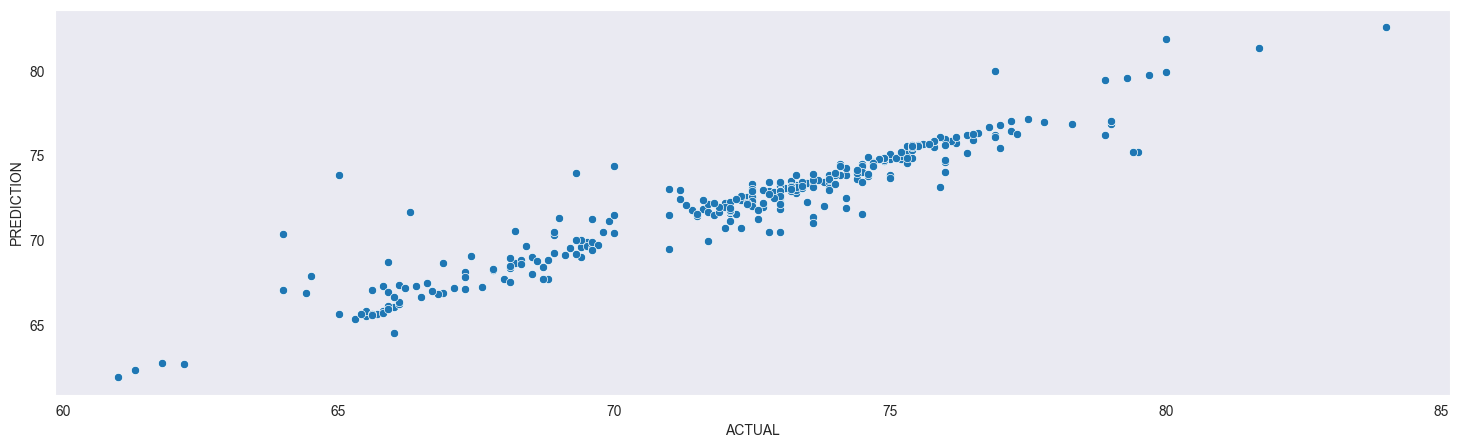

In [73]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");

In [75]:
model.score(x,y)*100

89.66741791474415